<a href="https://colab.research.google.com/github/Rociosamudio/Machine-Learning-Data-Science-II/blob/main/actividad_pr%C3%A1ctica_APIS_%22LizRocio_SamudioRuiz%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteca

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# !pip install scikit-learn


#Introduccion

Este dataset contiene datos de cuanta energia se produce a partir de diferentes fuentes, cuenta con datos de preccios y la carga total desde el 2015 hasta el 2018.
Los datos recopilados pueden ser empleados para entrenar algoritmos de aprendizaje automático, con modelos de series temporales. Al comprender las relaciones entre estos factores, podremos anticipar con mayor precisión la demanda energética, lo que permitirá optimizar la planificación de la producción y distribución de energía, y así lograr una gestión más eficiente de los recursos. Teniendo en cuenta estos datos tengo las siguientes hipotesis.


- LA primera es que existe una relacion lineal positiva entre la prevision ed carga total de energia y la carga real, entonces de esta manera decimos que si la previsión de cuánta energía se va a necesitar es alta, entonces la cantidad real de energía que se consuma también será alta, y viceversa. Considero esta hipotesis debido a que si la gente consume mucha energia se debe preveer de antemano el consumo.


- Mi siguiente hipotesis es que la distribucion de la energia solar a lo largo del tiempo muestra una consentracion significativa alrededor del medio dia.

-  Otra de las hipotesis que me surgen es que existe una correlacion entre la  generación de energía solar y la generación de energía eólica terrestre, donde los días con mayor generación solar también tienden a tener mayor generación eólica.


- La ultima hipotesis, Si se espera que la demanda de energía sea alta, se utiliza más energía fósil para satisfacer esa demanda.

Para probar mis Hipotesis vamos al analisis de datos!!!

Dataset obtenido de
https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather?resource=download

In [6]:
ruta_archivo = '/content/drive/MyDrive/Data Science II Liz_Rocio_Samudio_Ruiz/energy_DF.csv'

In [7]:
df = pd.read_csv(ruta_archivo)


In [8]:
df.shape #cantidad de filas y columnas

(35064, 31)

In [9]:
df.columns #noombre de las columnas

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'generation biomass ', 'ggeneration fossil oil'],
      dtype='object')

El nombre de las columnas de DF original me las trae en ingles, para mi personalmente es un poco mas practico en este caso traducirlas al español y renombrarlas.

In [10]:
traduccion = {
    'time': 'tiempo',
    'generation biomass': 'generación biomasa',
    'generation fossil brown coal/lignite': 'generación fósil carbón pardo/lignito',
    'generation fossil coal-derived gas': 'generación fósil gas derivado del carbón',
    'generation fossil gas': 'generación fósil gas',
    'generation fossil hard coal': 'generación fósil carbón duro',
    'generation fossil oil': 'generación fósil petróleo',
    'generation fossil oil shale': 'generación fósil esquisto bituminoso',
    'generation fossil peat': 'generación fósil turba',
    'generation geothermal': 'generación geotérmica',
    'generation hydro pumped storage aggregated': 'generación hidro bombeo almacenamiento agregado',
    'generation hydro pumped storage consumption': 'generación hidro bombeo almacenamiento consumo',
    'generation hydro run-of-river and poundage': 'generación hidro pasada por río y embalse',
    'generation hydro water reservoir': 'generación hidro embalse',
    'generation marine': 'generación marina',
    'generation nuclear': 'generación nuclear',
    'generation other': 'generación otra',
    'generation other renewable': 'generación otra renovable',
    'generation solar': 'generación solar',
    'generation waste': 'generación residuos',
    'generation wind offshore': 'generación eólica marina',
    'generation wind onshore': 'generación eólica terrestre',
    'forecast solar day ahead': 'previsión solar para el día siguiente',
    'forecast wind offshore eday ahead': 'previsión eólica marina para el día siguiente',
    'forecast wind onshore day ahead': 'previsión eólica terrestre para el día siguiente',
    'total load forecast': 'previsión de carga total',
    'total load actual': 'carga total real',
    'price day ahead': 'precio para el día siguiente',
    'price actual': 'precio real'
}

df = df.rename(columns=traduccion)# Renombrar las columnas del DataFrame
print(df.head())# Mostrar las primeras filas del DataFrame

                      tiempo  generación biomasa  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generación fósil carbón pardo/lignito  \
0                                  329.0   
1                                  328.0   
2                                  323.0   
3                                  254.0   
4                                  187.0   

   generación fósil gas derivado del carbón  generación fósil gas  \
0                                       0.0                4844.0   
1                                       0.0                5196.0   
2                                       0.0                4857.0   
3                                       0.0                4314.0   
4                                       0.0                4130.0   

   gene

In [11]:
print(df.dtypes)

tiempo                                               object
generación biomasa                                  float64
generación fósil carbón pardo/lignito               float64
generación fósil gas derivado del carbón            float64
generación fósil gas                                float64
generación fósil carbón duro                        float64
generación fósil petróleo                           float64
generación fósil esquisto bituminoso                float64
generación fósil turba                              float64
generación geotérmica                               float64
generación hidro bombeo almacenamiento agregado     float64
generación hidro bombeo almacenamiento consumo      float64
generación hidro pasada por río y embalse           float64
generación hidro embalse                            float64
generación marina                                   float64
generación nuclear                                  float64
generación otra                         

Observo que tiempo es una variable object y la pasare a formato date para poder conservar toda la información de tiempo e interpretar los resultados correctamente. Lo hare mas adelante por ahora avanzo en mis Datos nulos.

In [12]:
# Convierte la columna 'tiempo' a datetime64
df['tiempo'] = pd.to_datetime(df['tiempo'], utc=True)  # Convierte a datetime64 y maneja la zona horaria UTC

#Verifica el nuevo tipo de dato
print(df['tiempo'].dtype)  # Debería mostrar datetime64[ns, UTC]

#Exploramos los datos de tiempo
print(df['tiempo'].head(25))  # Muestra las primeras fechas para verificar la conversión


datetime64[ns, UTC]
0    2014-12-31 23:00:00+00:00
1    2015-01-01 00:00:00+00:00
2    2015-01-01 01:00:00+00:00
3    2015-01-01 02:00:00+00:00
4    2015-01-01 03:00:00+00:00
5    2015-01-01 04:00:00+00:00
6    2015-01-01 05:00:00+00:00
7    2015-01-01 06:00:00+00:00
8    2015-01-01 07:00:00+00:00
9    2015-01-01 08:00:00+00:00
10   2015-01-01 09:00:00+00:00
11   2015-01-01 10:00:00+00:00
12   2015-01-01 11:00:00+00:00
13   2015-01-01 12:00:00+00:00
14   2015-01-01 13:00:00+00:00
15   2015-01-01 14:00:00+00:00
16   2015-01-01 15:00:00+00:00
17   2015-01-01 16:00:00+00:00
18   2015-01-01 17:00:00+00:00
19   2015-01-01 18:00:00+00:00
20   2015-01-01 19:00:00+00:00
21   2015-01-01 20:00:00+00:00
22   2015-01-01 21:00:00+00:00
23   2015-01-01 22:00:00+00:00
24   2015-01-01 23:00:00+00:00
Name: tiempo, dtype: datetime64[ns, UTC]


#Diccionario de Variables
**Generación de Electricidad por Fuente**

tiempo: Indica el período de tiempo al que corresponden los datos (hora, día, etc.).

generación biomasa: Cantidad de electricidad generada a partir de biomasa (materia orgánica renovable).

generación fósil carbón pardo/lignito: Electricidad generada con carbón de baja calidad (lignito).

generación fósil gas derivado del carbón: Electricidad generada a partir de gas sintético obtenido del carbón.

generación fósil gas: Electricidad generada con gas natural.

generación fósil carbón duro: Electricidad generada con carbón de alta calidad (antracita, hulla).

generación fósil petróleo: Electricidad generada con petróleo.

generación fósil esquisto bituminoso: Electricidad generada a partir de rocas sedimentarias que contienen materia orgánica.

generación fósil turba: Electricidad generada con turba (combustible fósil similar al carbón).

generación geotérmica: Electricidad generada a partir del calor natural de la Tierra.

generación hidro bombeo almacenamiento agregado: Electricidad generada por centrales hidroeléctricas que bombean agua a un embalse para su uso posterior.

generación hidro bombeo almacenamiento consumo: Similar a la anterior, pero enfocada en el consumo de energía para el bombeo.

generación hidro pasada por río y embalse: Electricidad generada por centrales hidroeléctricas convencionales.

generación hidro embalse: Electricidad generada por centrales hidroeléctricas que utilizan un embalse.

generación marina: Electricidad generada a partir de la energía de las olas, mareas o corrientes marinas.

generación nuclear: Electricidad generada en centrales nucleares.

generación otra: Electricidad generada a partir de otras fuentes no especificadas.

generación otra renovable: Electricidad generada a partir de otras fuentes renovables no especificadas.

generación solar: Electricidad generada a partir de la energía solar (fotovoltaica o térmica).

generación residuos: Electricidad generada a partir de la incineración de residuos.

generación eólica marina: Electricidad generada por parques eólicos marinos.

generación eólica terrestre: Electricidad generada por parques eólicos terrestres.

**Previsión y Datos de Generación Renovable**

previsión solar para el día siguiente: Predicción de la generación solar para el día siguiente.

previsión eólica marina para el día siguiente: Predicción de la generación eólica marina para el día siguiente.

previsión eólica terrestre para el día siguiente: Predicción de la generación eólica terrestre para el día siguiente.

**Carga y Precio de la Electricidad**

previsión de carga total: Predicción de la demanda total de electricidad.
carga total real: Demanda real de electricidad.

precio para el día siguiente: Precio de la electricidad para el día siguiente (puede variar según la hora).

precio real: Precio real de la electricidad.




In [13]:
df.head() # vemos las 5 primeras filas del DF, los nombres y tipos de datos que contiene

,tiempo,generación biomasa,generación fósil carbón pardo/lignito,generación fósil gas derivado del carbón,generación fósil gas,generación fósil carbón duro,generación fósil petróleo,generación fósil esquisto bituminoso,generación fósil turba,generación geotérmica,...,generación eólica terrestre,previsión solar para el día siguiente,previsión eólica marina para el día siguiente,previsión eólica terrestre para el día siguiente,previsión de carga total,carga total real,precio para el día siguiente,precio real,generation biomass,ggeneration fossil oil
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,NaN,NaN
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,NaN,NaN
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,NaN,NaN
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,NaN,NaN
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,NaN,NaN


In [16]:
df.tail()

,tiempo,generación biomasa,generación fósil carbón pardo/lignito,generación fósil gas derivado del carbón,generación fósil gas,generación fósil carbón duro,generación fósil petróleo,generación fósil esquisto bituminoso,generación fósil turba,generación geotérmica,...,generación eólica terrestre,previsión solar para el día siguiente,previsión eólica marina para el día siguiente,previsión eólica terrestre para el día siguiente,previsión de carga total,carga total real,precio para el día siguiente,precio real,generation biomass,ggeneration fossil oil
35059,2018-12-31 18:00:00+00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02,NaN,NaN
35060,2018-12-31 19:00:00+00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16,NaN,NaN
35061,2018-12-31 20:00:00+00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30,NaN,NaN
35062,2018-12-31 21:00:00+00:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89,NaN,NaN
35063,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,NaN,NaN


In [15]:
df.describe() # muestra un resumen estadístico de las columnas numéricas DF


,generación biomasa,generación fósil carbón pardo/lignito,generación fósil gas derivado del carbón,generación fósil gas,generación fósil carbón duro,generación fósil petróleo,generación fósil esquisto bituminoso,generación fósil turba,generación geotérmica,generación hidro bombeo almacenamiento agregado,...,generación eólica terrestre,previsión solar para el día siguiente,previsión eólica marina para el día siguiente,previsión eólica terrestre para el día siguiente,previsión de carga total,carga total real,precio para el día siguiente,precio real,generation biomass,ggeneration fossil oil
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,34821.000000,35046.0,35046.0,35046.0,0.0,...,35046.000000,35064.000000,0.0,35064.000000,35064.000000,34580.000000,35064.000000,35064.000000,0.0,0.0
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.337210,0.0,0.0,0.0,NaN,...,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28697.198265,49.874341,57.884023,NaN,NaN
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.539683,0.0,0.0,0.0,NaN,...,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4573.106858,14.618900,14.204083,NaN,NaN
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000,NaN,NaN
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,2933.000000,69.000000,NaN,2979.000000,24793.750000,24811.750000,41.490000,49.347500,NaN,NaN
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,4849.000000,576.000000,NaN,4855.000000,28906.000000,28900.000000,50.520000,58.020000,NaN,NaN
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32193.000000,60.530000,68.010000,NaN,NaN
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000,NaN,NaN


Hasta aqui vemos diferentes fuentes de generación de energía y cuanta energia se genero a partir de cada fuente. Ademas de otros datos relevantes como el precio. Datos recolectaodos durante 3 años, con horarios y fechas desde el 2015 al 2018.

Se púede hacer las siguientes OBS en una primera mirada:
- Hay mas dependencia de los combustibles fosiles (carbón, gas, petróleo) tiene valores promedio y máximos significativamente más altos que las fuentes renovables.
-La generacion Hidroelectrica, muestrra valores considerables como fuente de energía y posible apoyo para la gestión de la demanda.
- LA fuente renovable fuente marina, terrestre y la solar muestran valores que sugieren un potencial de crecimiento importante. Sus valores promedio son más bajos,tabine esto indica una menor contribución a la generación del total.



In [14]:
df.isnull().values.any()

np.True_

In [17]:
print(df.isnull().sum())

tiempo                                                  0
generación biomasa                                     19
generación fósil carbón pardo/lignito                  18
generación fósil gas derivado del carbón               18
generación fósil gas                                   18
generación fósil carbón duro                           18
generación fósil petróleo                             243
generación fósil esquisto bituminoso                   18
generación fósil turba                                 18
generación geotérmica                                  18
generación hidro bombeo almacenamiento agregado     35064
generación hidro bombeo almacenamiento consumo         19
generación hidro pasada por río y embalse              19
generación hidro embalse                               18
generación marina                                     219
generación nuclear                                     17
generación otra                                        18
generación otr

In [18]:
df.eq(0).sum()

,0
tiempo,0
generación biomasa,4
generación fósil carbón pardo/lignito,10517
generación fósil gas derivado del carbón,35046
generación fósil gas,1
generación fósil carbón duro,3
generación fósil petróleo,3
generación fósil esquisto bituminoso,35046
generación fósil turba,35046
generación geotérmica,35046


#Visualizacion de Nulos


<Axes: >

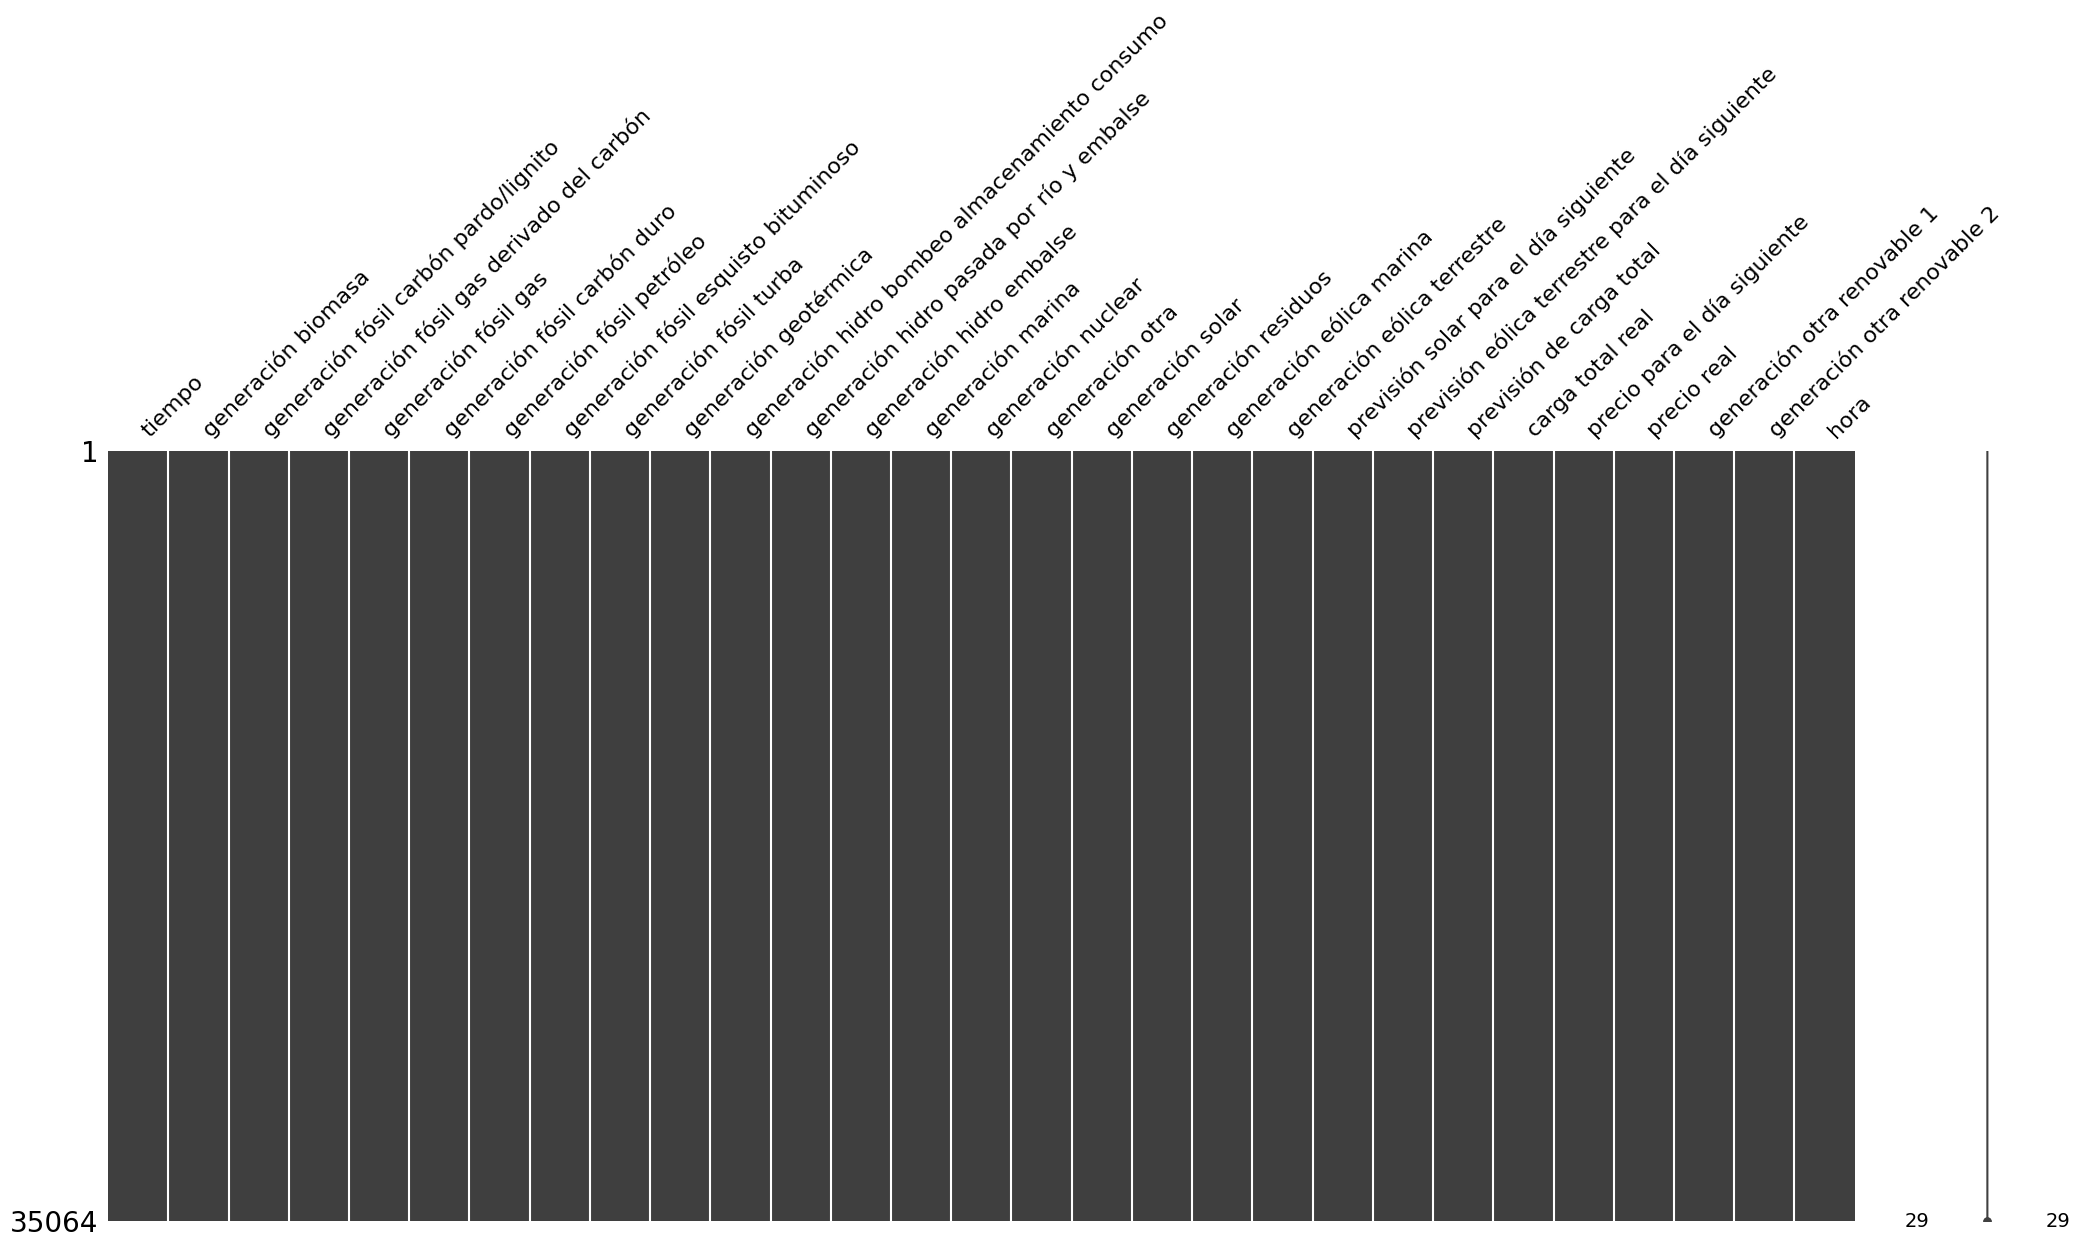

In [92]:
msno.matrix(df)

Con esta matrix de msmo se ve a simple vista las Columnas vacias, que considero que podria estar faltando por Error de registro, o datos no disponible0s. al ver que estan vacias por completo las voy a eliminar de mi Dataframe.

Los valores nulos de generación fósil petróleo que tiene 243 valores faltantes que las voy a reemplazar con la mediana porque la distribución general de los datos no son muy altos o muy bahos a diferencia del promedio.

Valores faltantes en generacion marina me encuentro en una duda con esto para tomar una decision debido a que podria ser un errores de medicion o no hubo generacion en esos periodos. Eliminar estos datos podria sesgar el analisis, voy a realizar un grafico comparativo del df actual y otra con el reemplazo por la mediana. De acuerdo a eso tomare la decision.

Generacion otra renovable no tiene valores extremos, lo voy a reemplazar por la mediana. algunas filas pueden ser menos relevantes, aunque eliminar estos datos  puede afectar a la prediccion.





#Paleta de colores

In [124]:
def establecer_paleta_viridis():
    """Establece la paleta de colores magma"""
    sns.set_palette("magma")  # Establecer la paleta de seaborn
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette("magma"))  # Establecer la paleta de matplotlib

##1 Reemplazo de nulos

<ipython-input-130-13bf323f4193>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='generación fósil petróleo', data=df, palette=['#D05C62', '#B41E53', '#8A0868', '#5E0881', '#33006F'])
<ipython-input-130-13bf323f4193>:5: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.boxplot(y='generación fósil petróleo', data=df, palette=['#D05C62', '#B41E53', '#8A0868', '#5E0881', '#33006F'])


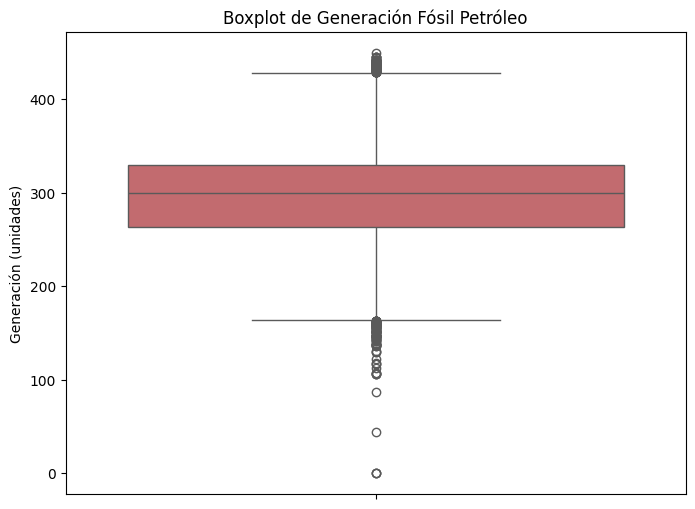

In [130]:
#Boxplot para revisar el reemplazo de nulos de generacion fosil

# Crear el boxplot con la paleta magma
plt.figure(figsize=(8, 6))
sns.boxplot(y='generación fósil petróleo', data=df, palette=['#D05C62', '#B41E53', '#8A0868', '#5E0881', '#33006F'])
plt.title('Boxplot de Generación Fósil Petróleo')
plt.ylabel('Generación (unidades)')
plt.show()


Observando este grafico, imputo con mas seguridad los nulos con la mediana, que segun el describe se veia mas robusto y no se vera tan afectada.

In [131]:
# Calculo de la mediana
mediana_petroleo = df['generación fósil petróleo'].median()

# Reemplazo los valores nulos por la mediana
df['generación fósil petróleo'].fillna(mediana_petroleo, inplace=True)

<ipython-input-131-bb44c1068492>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generación fósil petróleo'].fillna(mediana_petroleo, inplace=True)


## 2 Reemplazo de nulos

<ipython-input-132-5a1c143412f7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['generación marina'].fillna(mediana_marina, inplace=True)


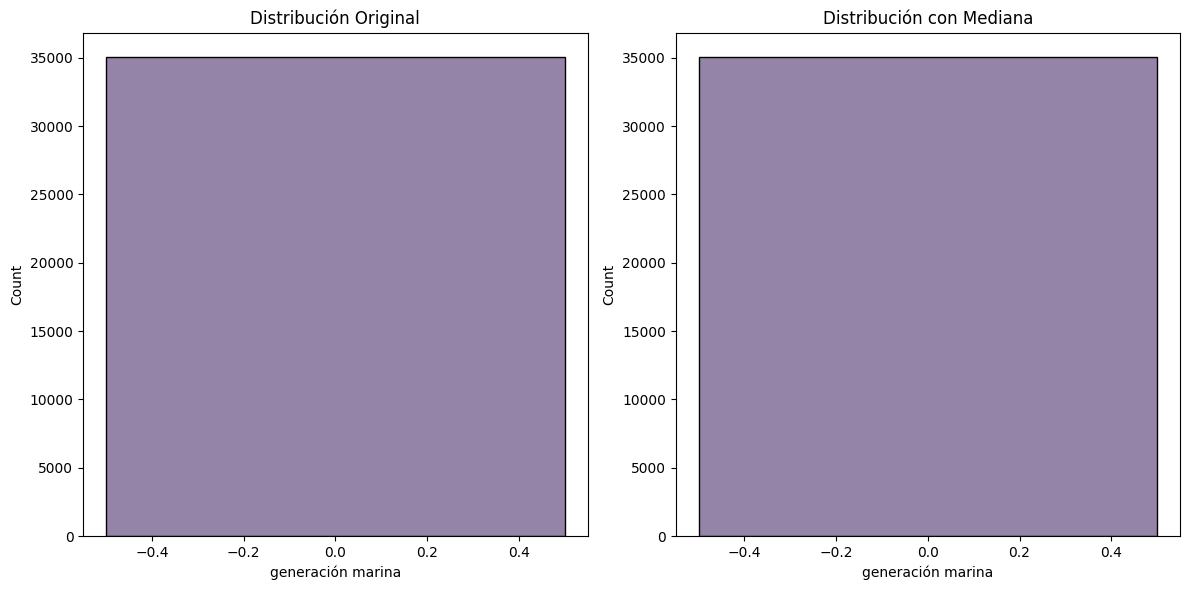

In [132]:

# Valores faltantes en generacion marina
#Realizo una copia del DataFrame original para no modificar los datos originales
df_copia = df.copy()

#Imputo los valores faltantes con la mediana
mediana_marina = df_copia['generación marina'].median()
df_copia['generación marina'].fillna(mediana_marina, inplace=True)

#gráfico de comparación
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  #Subgráfico de Distribución original
sns.histplot(df['generación marina'], kde=True)
plt.title('Distribución Original')

plt.subplot(1, 2, 2)  #Subgráfico de Distribución con mediana
sns.histplot(df_copia['generación marina'], kde=True)
plt.title('Distribución con Mediana')

plt.tight_layout()  # este item Ajusta los subgráficos para que no se superpongan
plt.show()

LA distribucion original sugiere que la mayoria de los datos son iguales o parecidos. es por esto que la mediana seria un valor mas representativo apra imputar los nulos.

In [118]:
# Calculo de la mediana de
mediana_marina = df['generación marina'].median()

# Reemplazo los valores nulos por la mediana
df['generación marina'].fillna(mediana_marina, inplace=True)

<ipython-input-118-81d8a5f4d68f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generación marina'].fillna(mediana_marina, inplace=True)


## 3 Reemplazo de nulos

In [135]:
# Imputo los valores faltantes con la mediana
mediana_otra_renovable = df['generación otra renovable'].median()
df['generación otra renovable'].fillna(mediana_otra_renovable, inplace=True)

#gráfico de comparación
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subgráfico de Distribución original
sns.histplot(df['generación otra renovable'], kde=True)
plt.title('Distribución Original')

plt.subplot(1, 2, 2)  # Subgráfico de Distribución con mediana
sns.histplot(df['generación otra renovable'], kde=True)
plt.title('Distribución con Mediana')

plt.tight_layout()  # Ajusto los subgráficos para que no se superpongan
plt.show()

KeyError: 'generación otra renovable'

el Grafico 1 que es el original nos demuestra una distribucion bimodal, es decir hay 2 subgrupos distintos. Luego de reemplazar los valores nulos con la mediana la distribucion se mantinee similar a la original pero se nota un aumento en el valor de la mediana y a su vez al ser la mediana no representa adecuadamente la presencia de estos 2 subgrupos. Creo que optare por dividir en 2 subgrupos en generacion otra renovable 1 y generacion otra renovable2. Y posterior ver si me conviene imputart los nulos por la media

In [136]:
# Divido la columna en dos subgrupos

# Identificamos el punto de corte entre los dos modos
punto_corte = 50

# Creamos las nuevas columnas
df['generación otra renovable 1'] = np.where(df['generación otra renovable'] <= punto_corte, df['generación otra renovable'], np.nan)
df['generación otra renovable 2'] = np.where(df['generación otra renovable'] > punto_corte, df['generación otra renovable'], np.nan)

#Imputo los nulos en cada subgrupo

# Calculo de la media de cada subgrupo (excluyendo los nulos)
media_grupo1 = df['generación otra renovable 1'].mean()
media_grupo2 = df['generación otra renovable 2'].mean()

# Imputamos los nulos con la media respectiva
df['generación otra renovable 1'].fillna(media_grupo1, inplace=True)
df['generación otra renovable 2'].fillna(media_grupo2, inplace=True)

# Elimino la columna original
df.drop('generación otra renovable', axis=1, inplace=True)

print(df.describe())

KeyError: 'generación otra renovable'

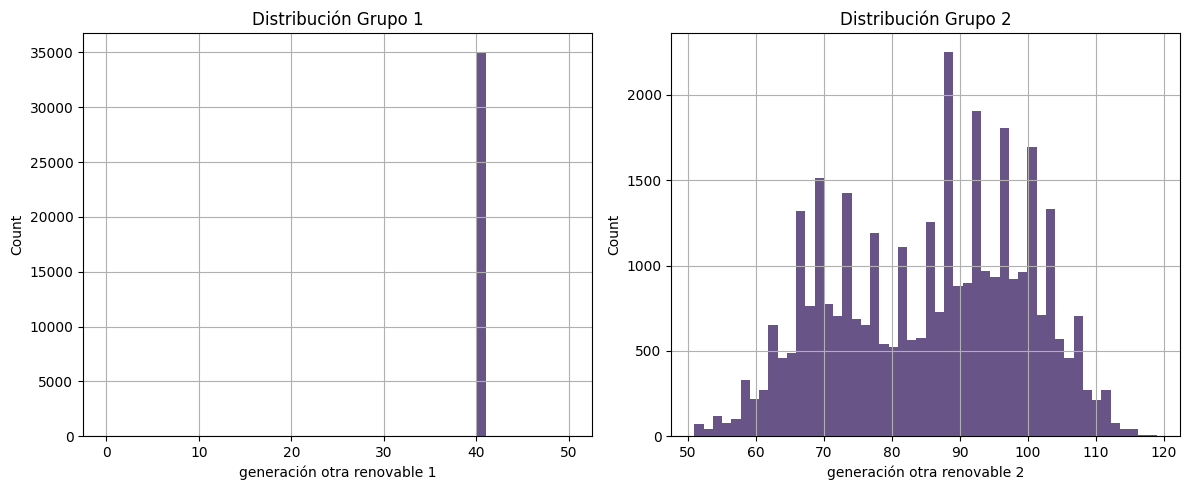

In [137]:
# 2. Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 3. Graficar la distribución de 'generación otra renovable 1'
df['generación otra renovable 1'].hist(ax=axes[0], bins=50, alpha=0.7, label='Grupo 1')
axes[0].set_title('Distribución Grupo 1')
axes[0].set_xlabel('generación otra renovable 1')
axes[0].set_ylabel('Count')

# 4. Graficar la distribución de 'generación otra renovable 2'
df['generación otra renovable 2'].hist(ax=axes[1], bins=50, alpha=0.7, label='Grupo 2')
axes[1].set_title('Distribución Grupo 2')
axes[1].set_xlabel('generación otra renovable 2')
axes[1].set_ylabel('Count')

# 5. Mostrar los gráficos
plt.tight_layout()
plt.show()

Del nuevo grafico vemos quedistribucion Grupo 1 es unimodal se agrupan alrededor de un valor central. Es asimetrica positiva, y el pico central esta entre 40 y 45 aprox.

 Grupo 2 es Bimodal, el rango se encunetra entre el 50 y 120, los picos parecen estar alrededor de 70 y 95.

 Siento que quedo mal pero no entiendo muy bien como mejorarlo.

## 4 Reemplazo de nulos

En la columna carga total real faltan 484 valores, lo que representa el 1.38% en mis datos es por esto que hare un histograma para poder tomar una desicion con mis nulos

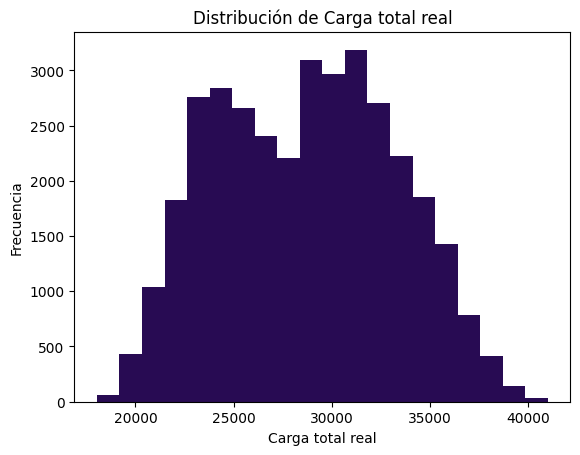

In [138]:
# histograma para ver como me conviene imputar los datos
plt.hist(df['carga total real'], bins=20)  # Ajusto el número de bins a necesidad
plt.xlabel('Carga total real')
plt.ylabel('Frecuencia')
plt.title('Distribución de Carga total real')
plt.show()

Voy a utilizar la mediana para reemplazar los nulos de esta columnas. Al usar la mediana, me aseguro de que el valor de reemplazo sea representativo del "centro" de los datos aunque esta sea bimodal.

Utilizo una copia al principio para ver como se distribuye

<ipython-input-139-05bd32467a4d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['carga total real'].fillna(mediana_carga_total_real, inplace=True)


0


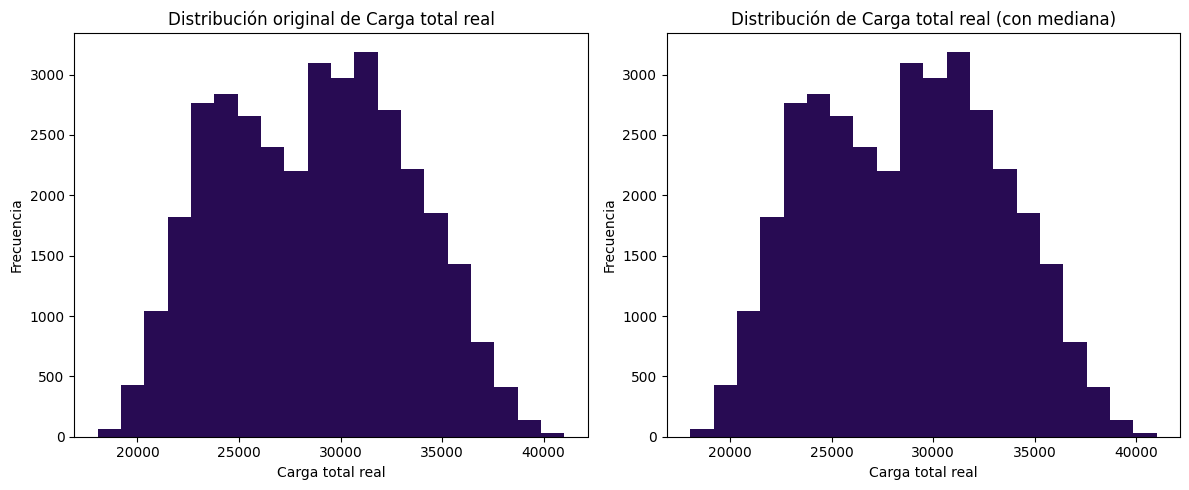

In [139]:
# 2. Crea una copia del DataFrame original
df_copy = df.copy()

# 3. Calcula la mediana de la columna 'carga total real' en la copia
mediana_carga_total_real = df_copy['carga total real'].median()

# 4. Imputa los valores nulos con la mediana en la copia
df_copy['carga total real'].fillna(mediana_carga_total_real, inplace=True)

# 5. (Opcional) Verifica que no queden valores nulos en la copia
print(df_copy['carga total real'].isnull().sum())  # Debería imprimir 0

# 6. Crea la figura y los subplots para los histogramas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 7. Grafica el histograma de la distribución original
axes[0].hist(df['carga total real'], bins=20)  # Ajusta el número de bins según sea necesario
axes[0].set_xlabel('Carga total real')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución original de Carga total real')

# 8. Grafica el histograma de la distribución con la mediana imputada
axes[1].hist(df_copy['carga total real'], bins=20)  # Ajusta el número de bins según sea necesario
axes[1].set_xlabel('Carga total real')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Carga total real (con mediana)')

# 9. Muestra los histogramas
plt.tight_layout()  # Ajusta los subplots para que no se superpongan
plt.show()

# 10. (Opcional) Guarda los datos con los valores imputados en un nuevo archivo
df_copy.to_csv("tu_archivo_con_mediana.csv", index=False)

La distribución resultante conserva las características principales de la distribución original, lo que sugiere que la mediana es una medida de tendencia central adecuada. avanzo en reemplazar mis datos en mi df orignal

In [140]:
# Imputa los valores nulos en la columna 'Distribución de Carga total'
# Calcula la mediana SOLO para esa columna
mediana_carga_total = df['carga total real'].median()
# Reemplaza los nulos SOLO en esa columna
df['carga total real'].fillna(mediana_carga_total, inplace=True)

# Verifica que no queden valores nulos en esa columna
print(df['carga total real'].isnull().sum())  # Debería imprimir 0

# 4. (Opcional) Guarda los datos con los valores imputados en un nuevo archivo
df.to_csv("tu_archivo_con_mediana_carga_total.csv", index=False)


<ipython-input-140-bd4c2d44e36a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['carga total real'].fillna(mediana_carga_total, inplace=True)


0


#Eliminar Columnas Vacias

In [30]:
#Quedo en rojo porque lo ejecute 2 veces, a la seg la columna ya no existia
#Elimina la columna del DataFrame generación hidro bombeo almacenamiento agregado
df = df.drop(columns=["generación hidro bombeo almacenamiento agregado"])

# Verifica que la columna haya sido eliminada
print(df.columns)

Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación solar', 'generación residuos', 'generación eólica marina',
       'generación eólica terrestre', 'previsión solar para el día siguiente',
       'previsión eólica marina para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguiente', 'precio real', 'generation biomass ',
       'ggeneration fossil oil', 'generación otra renovable 1'

In [31]:
# Elimina la columna del DataFrame ggeneration fossil oil
df = df.drop(columns=["ggeneration fossil oil"])

# Verifica que la columna haya sido eliminada
print(df.columns)

Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación solar', 'generación residuos', 'generación eólica marina',
       'generación eólica terrestre', 'previsión solar para el día siguiente',
       'previsión eólica marina para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguiente', 'precio real', 'generation biomass ',
       'generación otra renovable 1', 'generación otra renovab

In [32]:

# Elimina la columna del DataFrame revisión eólica marina para el día siguiente
df = df.drop(columns=["previsión eólica marina para el día siguiente"])

# Verifica que la columna haya sido eliminada
print(df.columns)

Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación solar', 'generación residuos', 'generación eólica marina',
       'generación eólica terrestre', 'previsión solar para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguiente', 'precio real', 'generation biomass ',
       'generación otra renovable 1', 'generación otra renovable 2'],
      dtype='object')


In [33]:
# Elimina la columna del DataFrame generation biomass
df = df.drop(columns=["generation biomass "])
print(df.columns)

Index(['tiempo', 'generación biomasa', 'generación fósil carbón pardo/lignito',
       'generación fósil gas derivado del carbón', 'generación fósil gas',
       'generación fósil carbón duro', 'generación fósil petróleo',
       'generación fósil esquisto bituminoso', 'generación fósil turba',
       'generación geotérmica',
       'generación hidro bombeo almacenamiento consumo',
       'generación hidro pasada por río y embalse', 'generación hidro embalse',
       'generación marina', 'generación nuclear', 'generación otra',
       'generación solar', 'generación residuos', 'generación eólica marina',
       'generación eólica terrestre', 'previsión solar para el día siguiente',
       'previsión eólica terrestre para el día siguiente',
       'previsión de carga total', 'carga total real',
       'precio para el día siguiente', 'precio real',
       'generación otra renovable 1', 'generación otra renovable 2'],
      dtype='object')


In [34]:
df.shape #cantidad de filas y columnas

(35064, 28)

<Axes: >

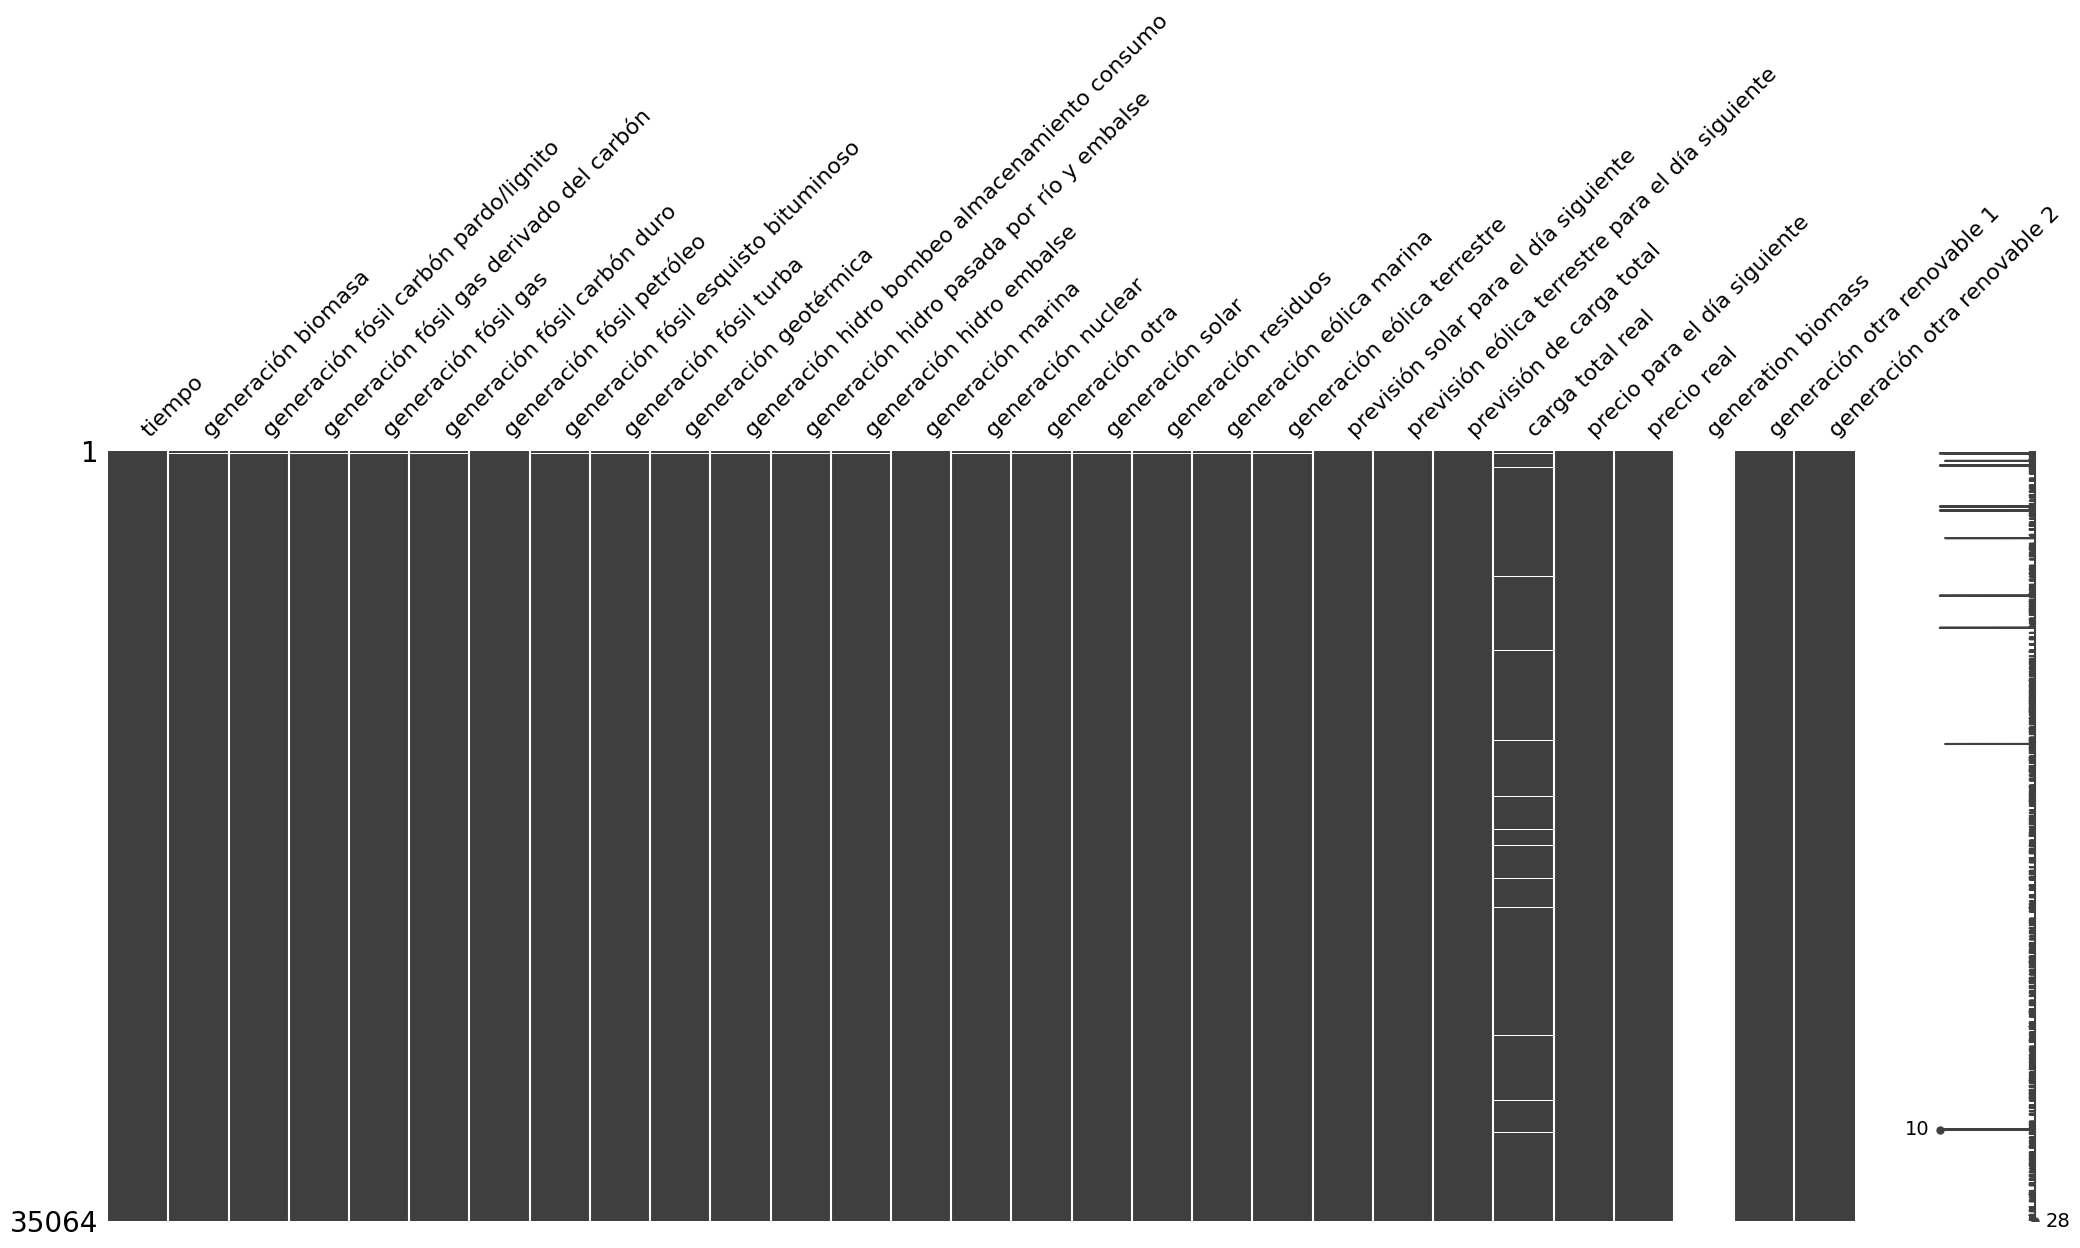

In [ ]:
msno.matrix(df)

Quiero ver que porcentaje de nulos me queda por reemplazar

In [35]:
#porcentaje de valores nulos en cada columna
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

#Imprime el resultado
print(porcentaje_nulos)

tiempo                                              0.000000
generación biomasa                                  0.054187
generación fósil carbón pardo/lignito               0.051335
generación fósil gas derivado del carbón            0.051335
generación fósil gas                                0.051335
generación fósil carbón duro                        0.051335
generación fósil petróleo                           0.000000
generación fósil esquisto bituminoso                0.051335
generación fósil turba                              0.051335
generación geotérmica                               0.051335
generación hidro bombeo almacenamiento consumo      0.054187
generación hidro pasada por río y embalse           0.054187
generación hidro embalse                            0.051335
generación marina                                   0.000000
generación nuclear                                  0.048483
generación otra                                     0.051335
generación solar        

Feliz, Dataset sin nulos. Profe me costo un monton!! Avisame si tengo que borrar mis comentarios ;D

In [36]:
# Lista de columnas con nulos
columnas_con_nulos = ['generación biomasa', 'generación fósil carbón pardo/lignito',
                     'generación fósil gas derivado del carbón', 'generación fósil gas',
                     'generación fósil carbón duro', 'generación fósil esquisto bituminoso',
                     'generación fósil turba', 'generación geotérmica',
                     'generación hidro bombeo almacenamiento consumo',
                     'generación hidro pasada por río y embalse', 'generación hidro embalse',
                     'generación nuclear', 'generación otra', 'generación solar',
                     'generación residuos', 'generación eólica marina',
                     'generación eólica terrestre']

#Itera sobre las columnas con nulos
for columna in columnas_con_nulos:
    #Calcula la mediana de la columna
    mediana = df[columna].median()
    # Reemplaza los valores nulos en la columna con la mediana
    df[columna].fillna(mediana, inplace=True)

#Verificamos que no queden valores nulos en las columnas especificadas
print(df[columnas_con_nulos].isnull().sum())  # Debería imprimir 0 para cada columna

#Guardo los datos con los valores imputados en un nuevo archivo
df.to_csv("tu_archivo_con_mediana.csv", index=False)

<ipython-input-36-7839c8997547>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(mediana, inplace=True)


generación biomasa                                0
generación fósil carbón pardo/lignito             0
generación fósil gas derivado del carbón          0
generación fósil gas                              0
generación fósil carbón duro                      0
generación fósil esquisto bituminoso              0
generación fósil turba                            0
generación geotérmica                             0
generación hidro bombeo almacenamiento consumo    0
generación hidro pasada por río y embalse         0
generación hidro embalse                          0
generación nuclear                                0
generación otra                                   0
generación solar                                  0
generación residuos                               0
generación eólica marina                          0
generación eólica terrestre                       0
dtype: int64


Considero que al dividir mis datos en energia renovable y fosiles puedo hacer una comparativa mas eficiente, y desde aqui probar una de mis hipotesis que la energia solar es la energia que mas se consume dentro de las renovables y dentro de las fosiles es el gas.

#Analisis Univariado

## Energia renovable
 Quisiera una visión general de la distribución y las características de la generación de energía renovable en mi conjunto de datos. PAra ello busco ver mediante histogramas la distribucion de los datos y si hay sesgos. y posterior un Top 5 de las energias mas utilizadas, probando mi hipotesis de que la energia solar es la que mas se consume dentro de este rango.

Estadísticas descriptivas para la generación de energía renovable:
       generación biomasa  generación geotérmica  \
count        35064.000000                35064.0   
mean           383.504592                    0.0   
std             85.331679                    0.0   
min              0.000000                    0.0   
25%            333.000000                    0.0   
50%            367.000000                    0.0   
75%            433.000000                    0.0   
max            592.000000                    0.0   

       generación hidro bombeo almacenamiento consumo  \
count                                    35064.000000   
mean                                       475.356491   
std                                        792.248672   
min                                          0.000000   
25%                                          0.000000   
50%                                         68.000000   
75%                                        615.000000   
max     

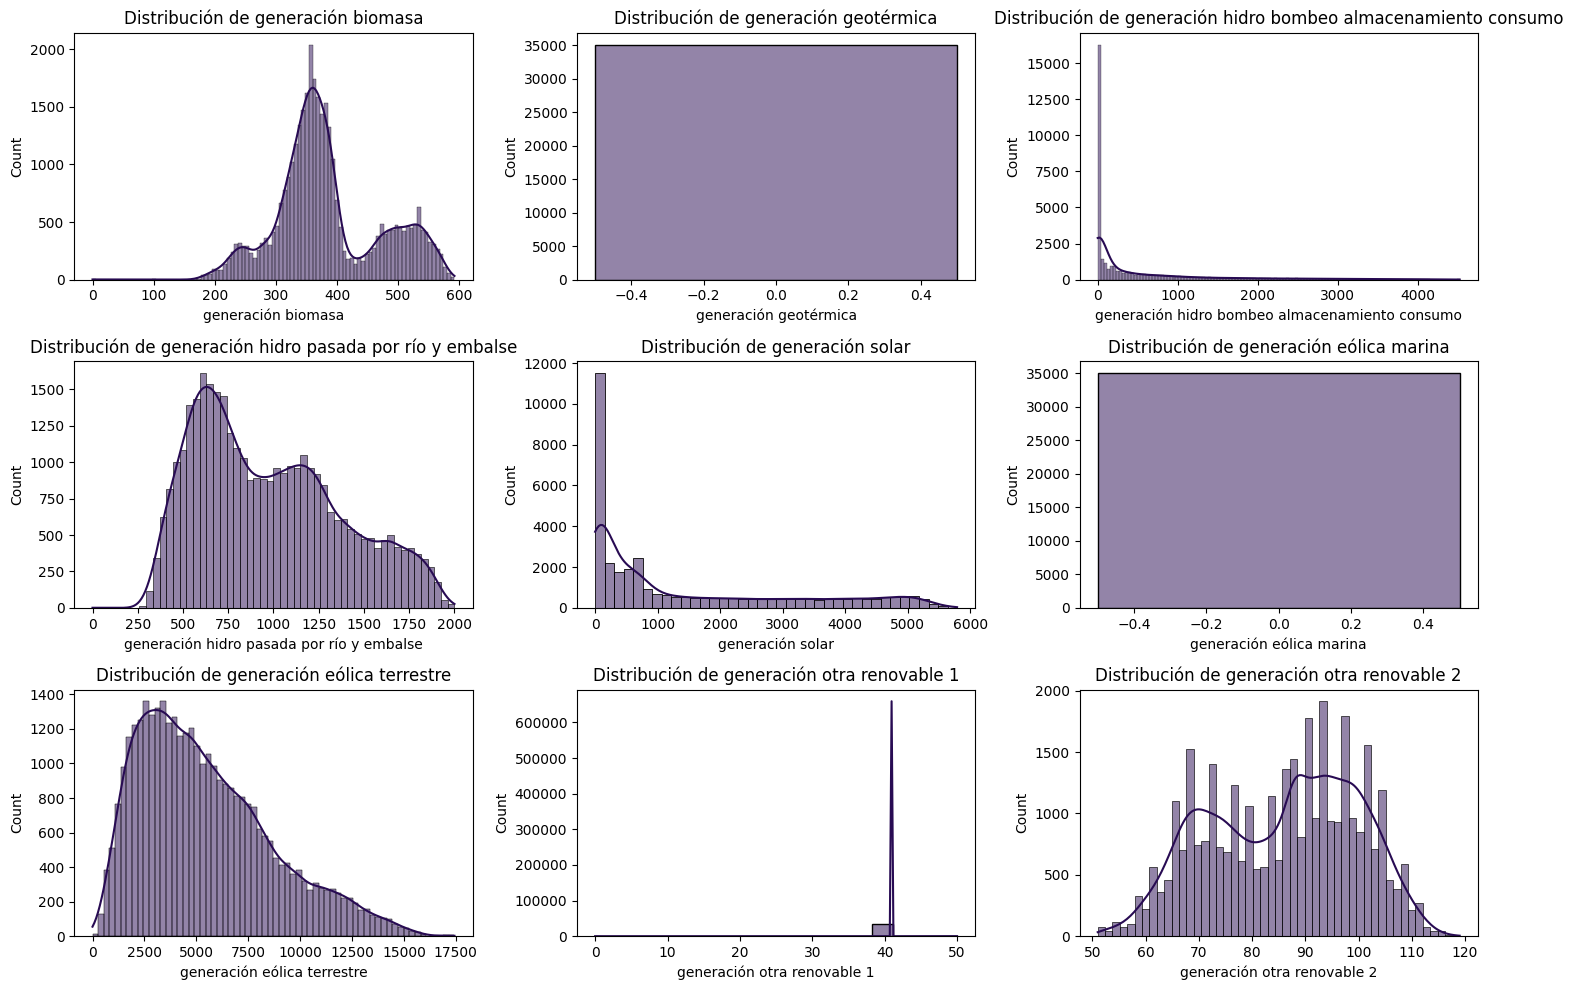

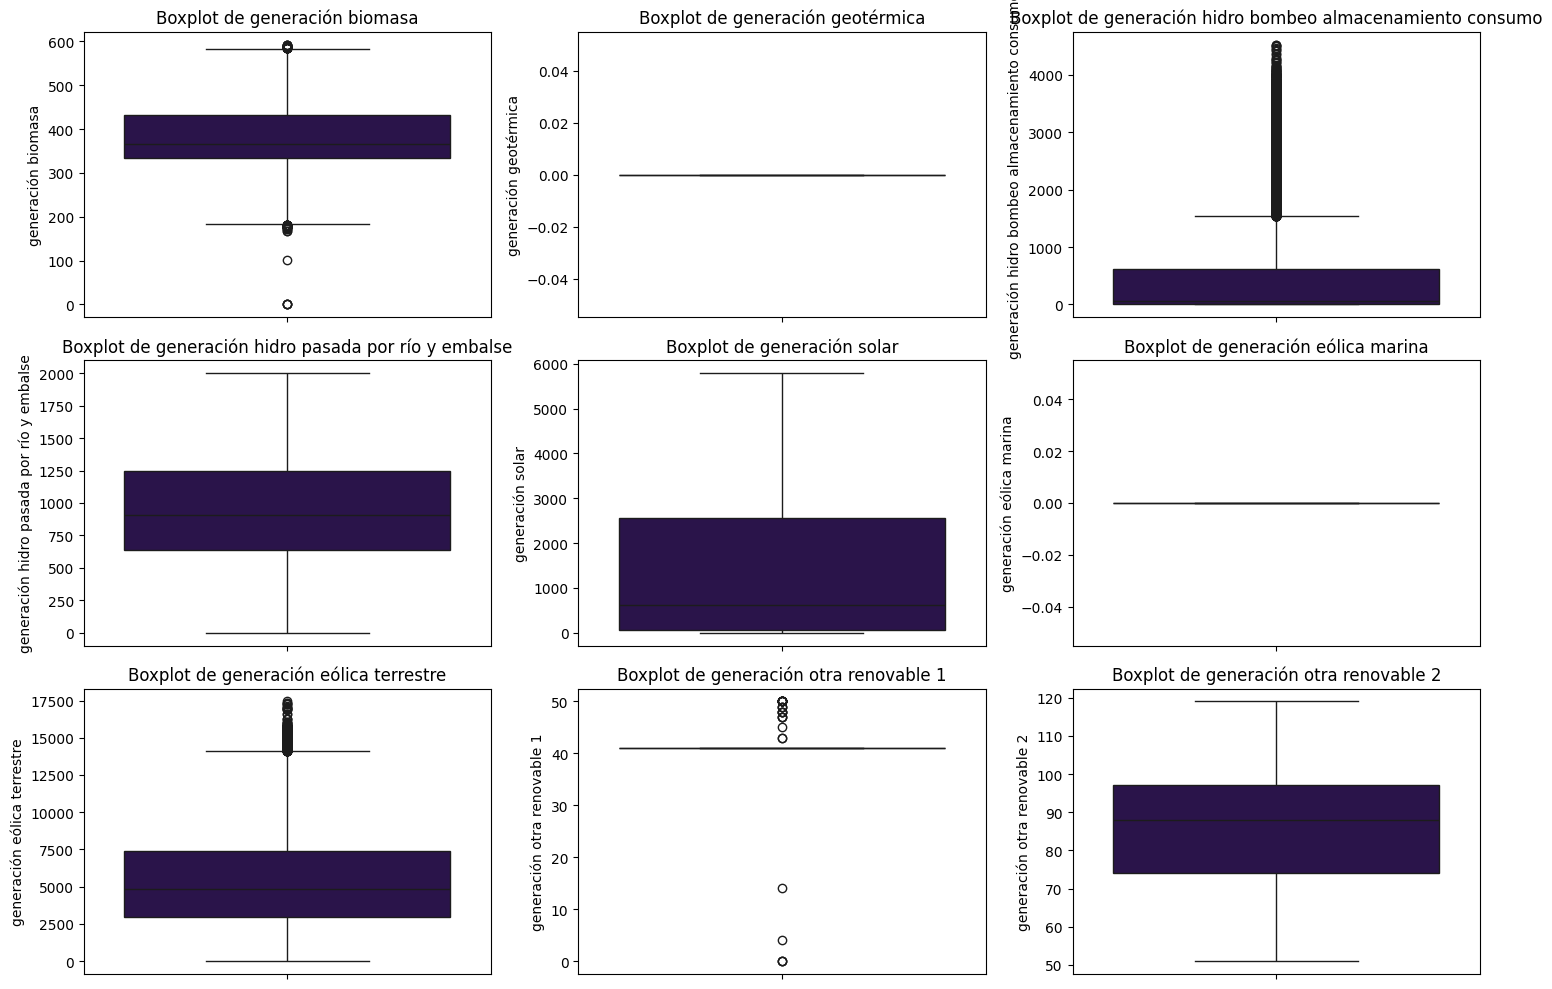

In [164]:
# Columnas de generación de energía renovable
renewable_columns = [
    'generación biomasa',
    'generación geotérmica',
    'generación hidro bombeo almacenamiento consumo',
    'generación hidro pasada por río y embalse',
    'generación solar',
    'generación eólica marina',
    'generación eólica terrestre',
    'generación otra renovable 1',
    'generación otra renovable 2'
]

# Crear una copia del DataFrame original
df_renewable = df.copy()

# Calcular estadísticas descriptivas para cada columna de generación renovable
descriptive_stats = df_renewable[renewable_columns].describe()

print("Estadísticas descriptivas para la generación de energía renovable:")
print(descriptive_stats)

# Crear histogramas para cada columna de generación renovable
plt.figure(figsize=(15, 10))
for i, column in enumerate(renewable_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_renewable[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

# Crear boxplots para cada columna de generación renovable
plt.figure(figsize=(15, 10))
for i, column in enumerate(renewable_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_renewable[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

 Generación Geotérmica y Eólica Marina, muestran una generación constante en 0. Esto sugiere que estas fuentes de energía renovable no están contribuyendo a la generación de energía en el conjunto de datos.

 Generación Hidro Bombeo Almacenamiento Consumo, Solar y Eólica Terrestre: Estos tres boxplots muestran distribuciones sesgadas a la derecha con valores atípicos altos. Esto indica que la generación de energía de estas fuentes es variable y que hay momentos en los que la generación es excepcionalmente alta.


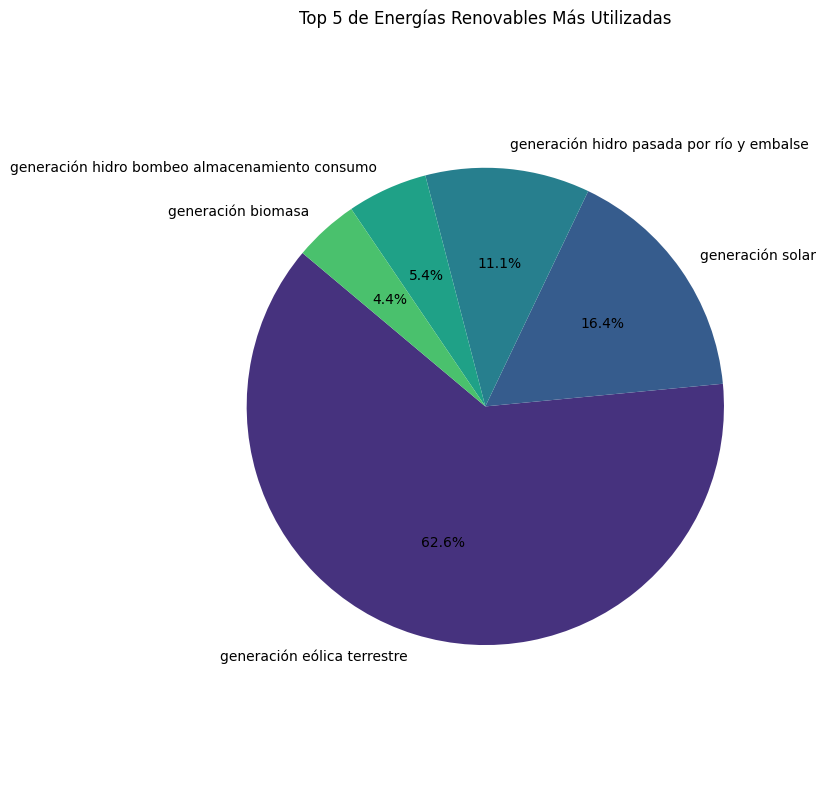

In [167]:
# Columnas de generación de energía renovable
renewable_columns = [
    'generación biomasa',
    'generación geotérmica',
    'generación hidro bombeo almacenamiento consumo',
    'generación hidro pasada por río y embalse',
    'generación solar',
    'generación eólica marina',
    'generación eólica terrestre',
    'generación otra renovable 1',
    'generación otra renovable 2'
]


# Calcular la generación total de cada tipo de energía renovable
generation_totals = df_renewable[renewable_columns].sum()

# Crear un DataFrame para facilitar la ordenación
generation_df = pd.DataFrame({'Energía': generation_totals.index, 'Generación Total': generation_totals.values})

# Ordenar de mayor a menor generación
top_5_generation = generation_df.nlargest(5, 'Generación Total')

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(top_5_generation['Generación Total'], labels=top_5_generation['Energía'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Top 5 de Energías Renovables Más Utilizadas')
plt.axis('equal')  # Equal aspect ratio asegura que la torta se dibuje como un círculo
plt.tight_layout()
plt.show()

Hipotesis rechazadam para mi sorpresa la generación eólica terrestre representa la mayor proporción del top 5 de energías renovables más utilizadas, con un 62.6%. Esto indica que la energía eólica terrestre es una fuente de energía renovable significativa en el contexto analizado.
La generación solar es la segunda fuente de energía renovable más utilizada, lo que indica su creciente importancia en la producción de energía limpia.

La energía eólica terrestre tiene un gran potencial de crecimiento y desarrollo, ya que es una fuente de energía renovable abundante y ampliamente disponible, al igual que la energia solar.

Ambas me interesa como variable para predecir el cpnsumo seguire en mi analisis para quedarme con una variable.

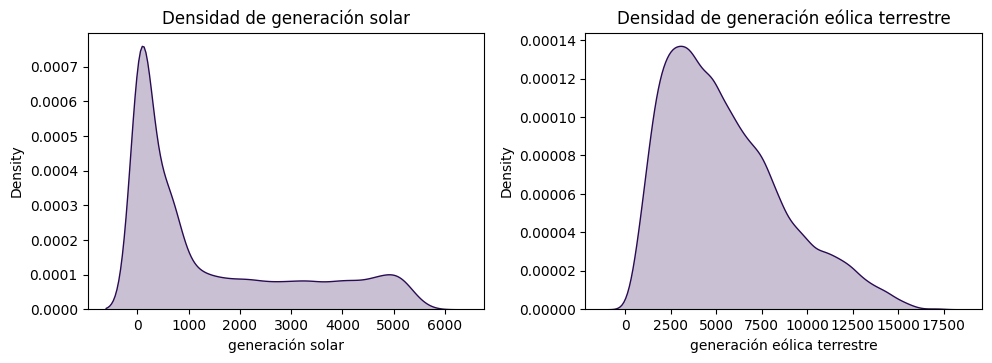

In [168]:


# Columnas de generación de energía renovable
renewable_columns = [

    'generación solar',

    'generación eólica terrestre',
 ]

# Crear una copia del DataFrame original
df_renewable = df.copy()

# Crear gráficos de densidad para cada columna de generación renovable
plt.figure(figsize=(15, 10))
for i, column in enumerate(renewable_columns):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(df_renewable[column], fill=True)  # Usamos kdeplot para gráficos de densidad
    plt.title(f'Densidad de {column}')
plt.tight_layout()
plt.show()

Los gráficos de densidad muestran que tanto la generación solar como la eólica terrestre son fuentes de energía intermitentes con distribuciones sesgadas a la derecha. La generación solar tiende a tener valores atípicos más extremos, mientras que la generación eólica terrestre es más variable en general.

Aunque la generación eólica terrestre también tiene valores atípicos, estos tienden a ser menos extremos en comparación con la generación solar.

 ##Top 5 Energia renovable mas utilizada

## Energia Fosil


Estadísticas descriptivas para la generación de energía fósil:
       generación fósil carbón pardo/lignito  \
count                           35064.000000   
mean                              448.090492   
std                               354.480256   
min                                 0.000000   
25%                                 0.000000   
50%                               509.000000   
75%                               757.000000   
max                               999.000000   

       generación fósil gas derivado del carbón  generación fósil gas  \
count                                   35064.0          35064.000000   
mean                                        0.0           5622.401894   
std                                         0.0           2201.315046   
min                                         0.0              0.000000   
25%                                         0.0           4127.000000   
50%                                         0.0           4969.000

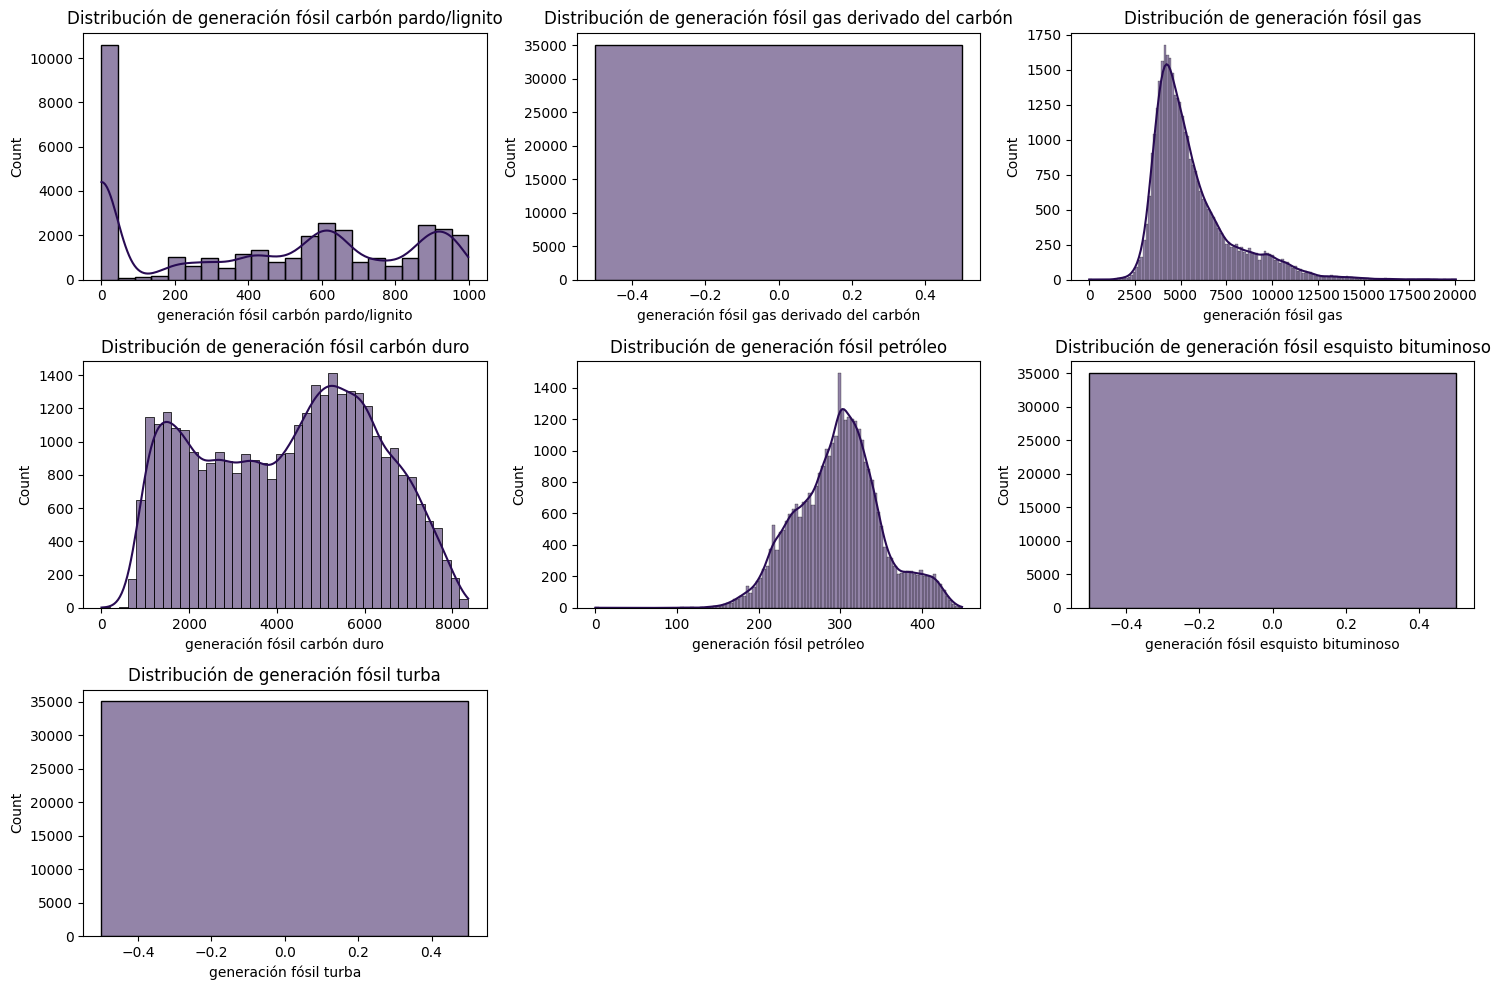

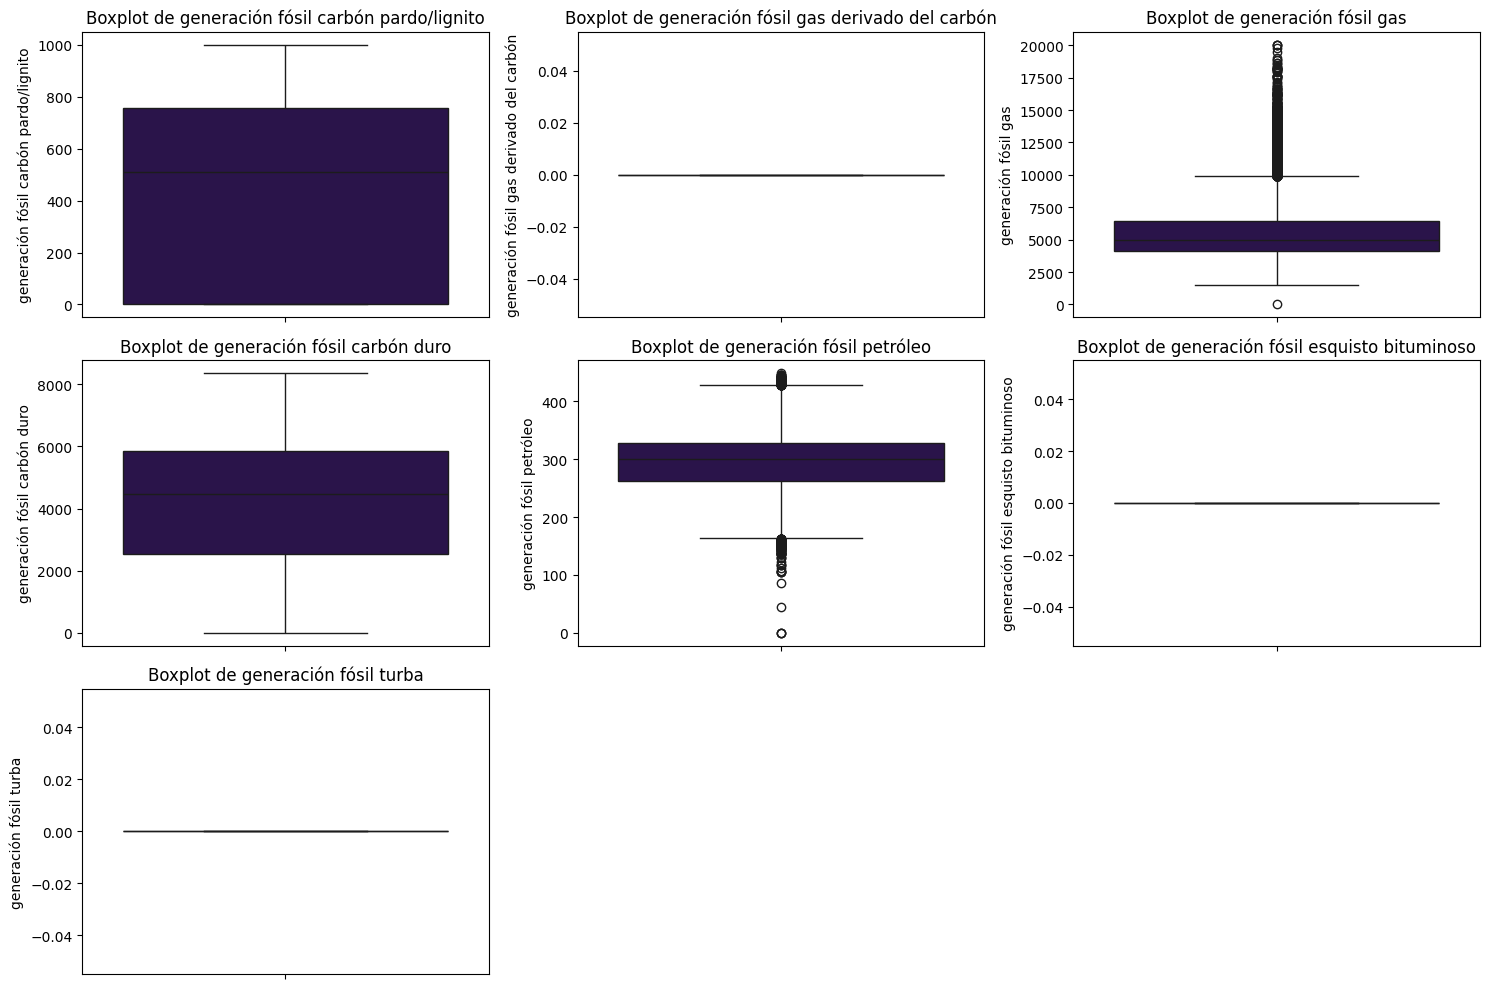

In [163]:
# Columnas de generación de energía fósil
fossil_columns = [
    'generación fósil carbón pardo/lignito',
    'generación fósil gas derivado del carbón',
    'generación fósil gas',
    'generación fósil carbón duro',
    'generación fósil petróleo',
    'generación fósil esquisto bituminoso',
    'generación fósil turba'
]

# Crear una copia del DataFrame original
df_fossil = df.copy()

# Calcular estadísticas descriptivas para cada columna de generación fósil
descriptive_stats_fossil = df_fossil[fossil_columns].describe()

print("Estadísticas descriptivas para la generación de energía fósil:")
print(descriptive_stats_fossil)

# Crear histogramas para cada columna de generación fósil
plt.figure(figsize=(15, 10))
for i, column in enumerate(fossil_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_fossil[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

# Crear boxplots para cada columna de generación fósil
plt.figure(figsize=(15, 10))
for i, column in enumerate(fossil_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_fossil[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

La generación constante en cero para el gas derivado del carbón, el esquisto bituminoso y de generacion fosil turba. Esto podría indicar que estas fuentes no están en uso, podria eliminarlas del modelo ya que no afectarian.

ME llama la atencion el sesgo extremo en la generación de gas, que sugiere una dependencia muy puntual de esta fuente de energía.y la distribución bimodal del carbón duro, ya que esto puede significar que hay dos maneras muy marcadas de utilizar este recurso.

generación de petróleo se distribuye de forma bastante uniforme cuando está activa. Hay algunos valores atípicos, pero no son extremos. Estos valores atípicos

Top 5 de la generacion energia Fosil

Top 5 de energías fósiles más utilizadas:
                                    Energía  Generación Total
2                      generación fósil gas       197143900.0
3              generación fósil carbón duro       149238612.0
0     generación fósil carbón pardo/lignito        15711845.0
4                 generación fósil petróleo        10461300.0
1  generación fósil gas derivado del carbón               0.0


<ipython-input-161-bd412b501670>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Generación Total', y='Energía', data=top_5_fossil, palette='viridis')


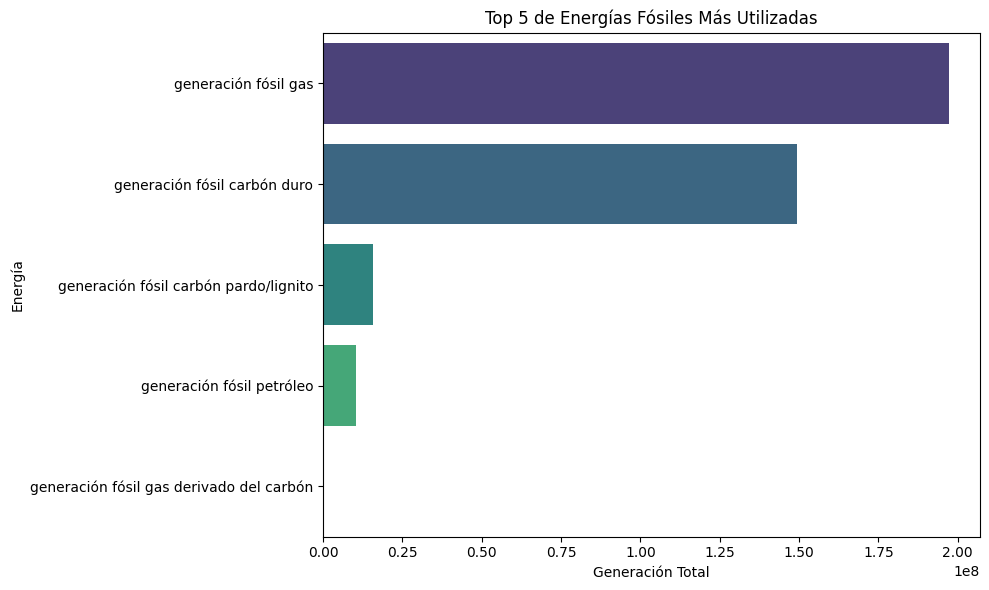

In [161]:
# Asumiendo que df está definido y contiene tus datos

# Columnas de generación de energía fósil
fossil_columns = [
    'generación fósil carbón pardo/lignito',
    'generación fósil gas derivado del carbón',
    'generación fósil gas',
    'generación fósil carbón duro',
    'generación fósil petróleo',
    'generación fósil esquisto bituminoso',
    'generación fósil turba'
]

# Crear una copia del DataFrame original
df_fossil = df.copy()

# Calcular la generación total de cada tipo de energía fósil
generation_totals_fossil = df_fossil[fossil_columns].sum()

# Crear un DataFrame para facilitar la ordenación
generation_df_fossil = pd.DataFrame({'Energía': generation_totals_fossil.index, 'Generación Total': generation_totals_fossil.values})

# Ordenar de mayor a menor generación
top_5_fossil = generation_df_fossil.nlargest(5, 'Generación Total')

print('Top 5 de energías fósiles más utilizadas:')
print(top_5_fossil)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Generación Total', y='Energía', data=top_5_fossil, palette='viridis')
plt.title('Top 5 de Energías Fósiles Más Utilizadas')
plt.xlabel('Generación Total')
plt.ylabel('Energía')
plt.tight_layout()
plt.show()

#Analisis Bivariado

## Comparacion de las energias por año y por mes

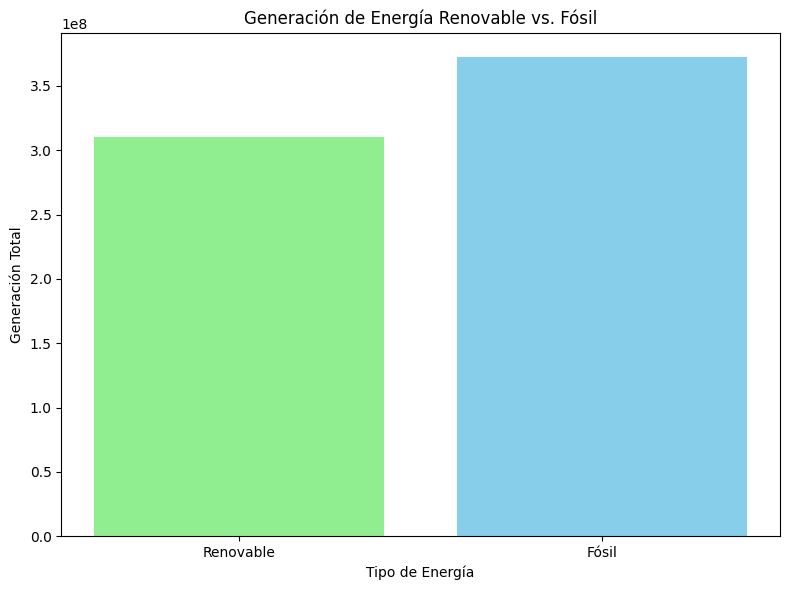

In [169]:
#codigo para comparar en general cual es la que mas se utiliza se espera que sea fosil, comparo por año
# Columnas de generación de energía renovable
renewable_columns = [
    'generación biomasa',
    'generación geotérmica',
    'generación hidro bombeo almacenamiento consumo',
    'generación hidro pasada por río y embalse',
    'generación solar',
    'generación eólica marina',
    'generación eólica terrestre',
    'generación otra renovable 1',
    'generación otra renovable 2'
]

# Columnas de generación de energía fósil
fossil_columns = [
    'generación fósil carbón pardo/lignito',
    'generación fósil gas derivado del carbón',
    'generación fósil gas',
    'generación fósil carbón duro',
    'generación fósil petróleo',
    'generación fósil esquisto bituminoso',
    'generación fósil turba'
]

# Crear copias de los DataFrames originales
df_renewable = df.copy()
df_fossil = df.copy()

# Calcular la generación total de energía renovable y fósil
total_renewable = df_renewable[renewable_columns].sum().sum()
total_fossil = df_fossil[fossil_columns].sum().sum()

# Crear un DataFrame para el gráfico de barras apiladas
data = {'Energía': ['Renovable', 'Fósil'], 'Generación Total': [total_renewable, total_fossil]}
df_plot = pd.DataFrame(data)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8, 6))
plt.bar(df_plot['Energía'], df_plot['Generación Total'], color=['lightgreen', 'skyblue'])
plt.title('Generación de Energía Renovable vs. Fósil')
plt.xlabel('Tipo de Energía')
plt.ylabel('Generación Total')
plt.tight_layout()
plt.show()

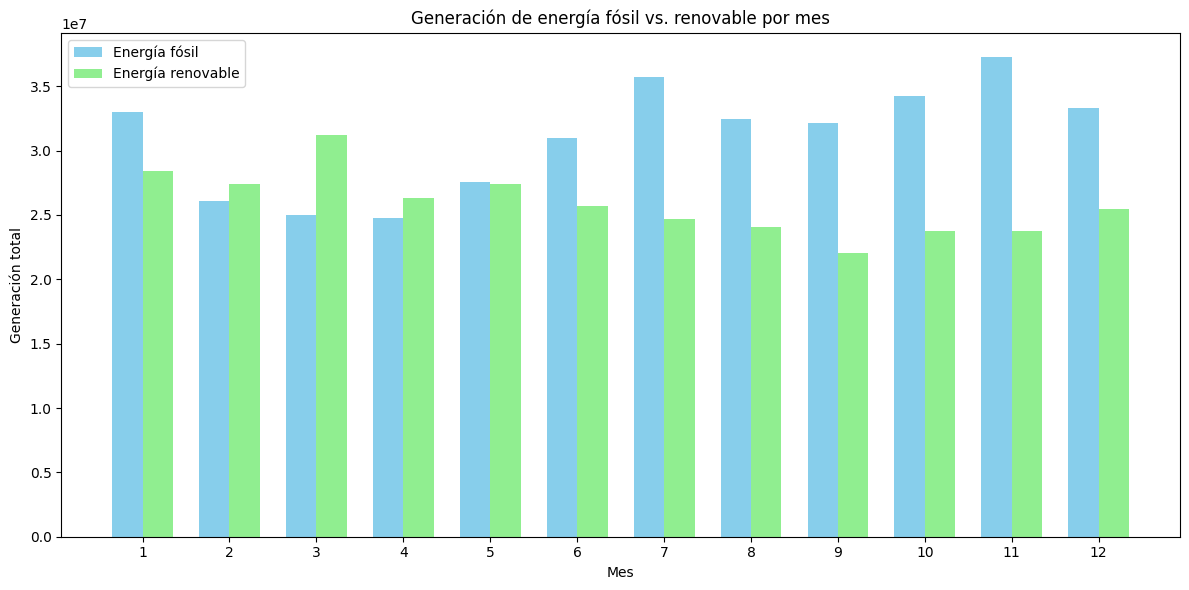

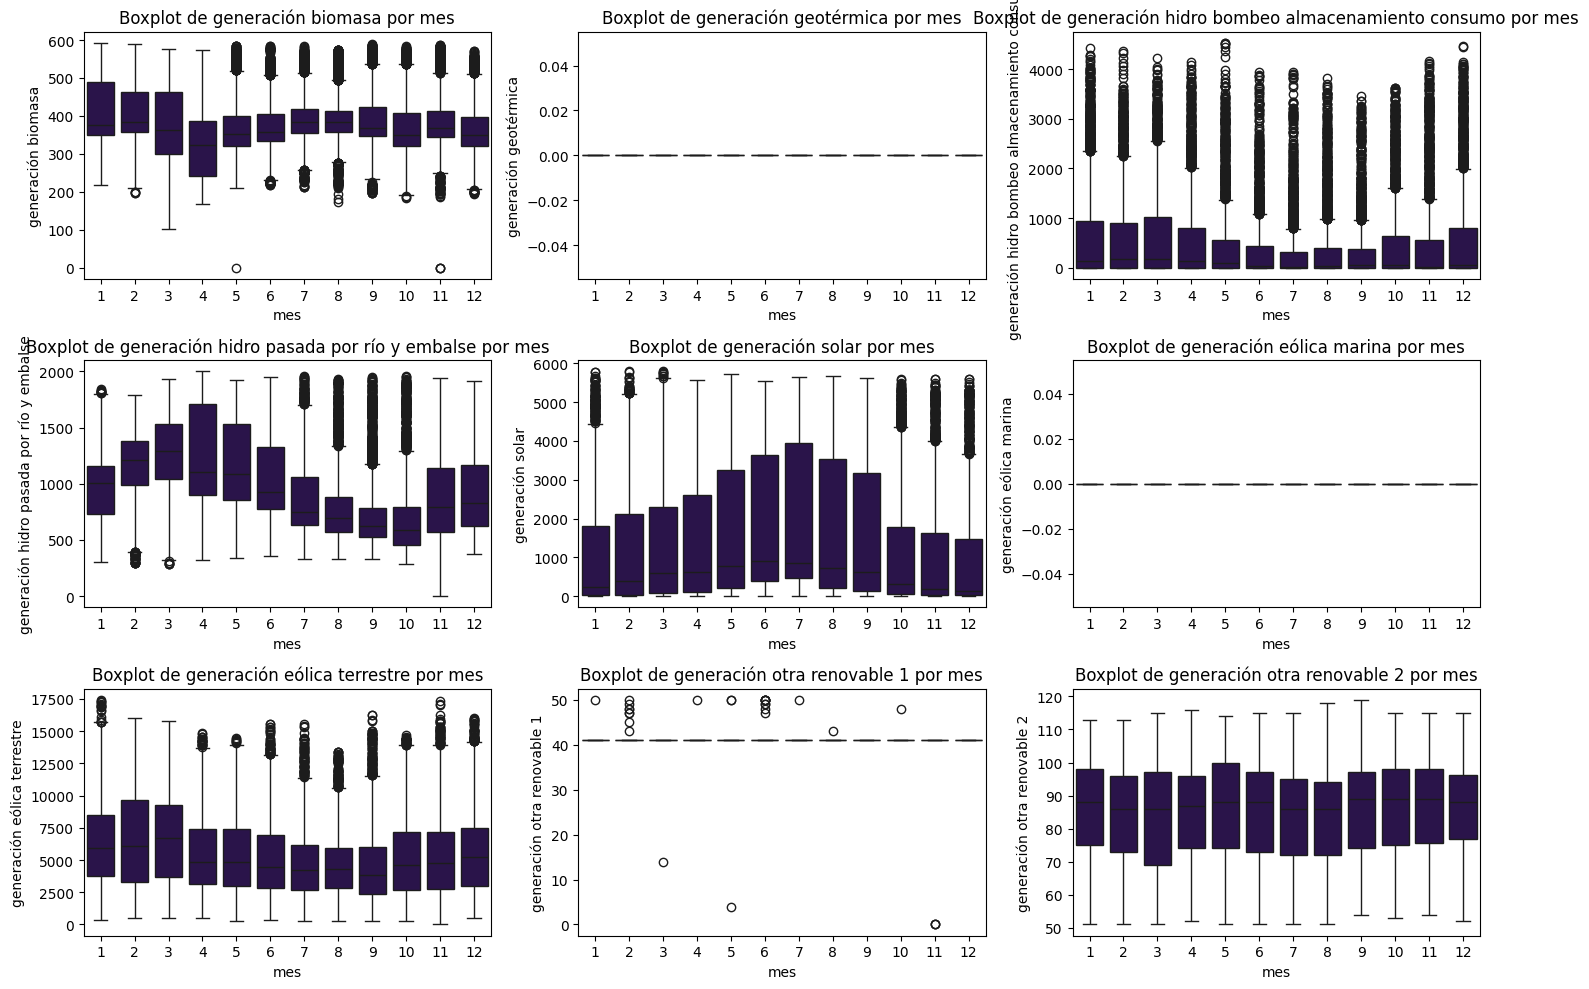

In [146]:
#Comparo las energias utilizadas por mes segun su origen.
# Columnas de generación de energía fósil
fossil_columns = [
    'generación fósil carbón pardo/lignito',
    'generación fósil gas derivado del carbón',
    'generación fósil gas',
    'generación fósil carbón duro',
    'generación fósil petróleo',
    'generación fósil esquisto bituminoso',
    'generación fósil turba'
]

# Columnas de generación de energía renovable
renewable_columns = [
    'generación biomasa',
    'generación geotérmica',
    'generación hidro bombeo almacenamiento consumo',
    'generación hidro pasada por río y embalse',
    'generación solar',
    'generación eólica marina',
    'generación eólica terrestre',
    'generación otra renovable 1',
    'generación otra renovable 2'
]

# Crear copias de los DataFrames originales
df_monthly_fossil = df.copy()
df_monthly = df.copy()

# Extraer el mes de la columna 'tiempo'
df_monthly_fossil['mes'] = df_monthly_fossil['tiempo'].dt.month
df_monthly['mes'] = df_monthly['tiempo'].dt.month

# Calcular la generación total de energía fósil y renovable por mes
df_monthly_fossil['generación fósil total'] = df_monthly_fossil[fossil_columns].sum(axis=1)
df_monthly['generación renovable total'] = df_monthly[renewable_columns].sum(axis=1)

# Agrupar por mes y sumar la generación
monthly_fossil_generation = df_monthly_fossil.groupby('mes')['generación fósil total'].sum()
monthly_generation = df_monthly.groupby('mes')['generación renovable total'].sum()

# Crear el gráfico de barras comparativo
plt.figure(figsize=(12, 6))

bar_width = 0.35
r1 = np.arange(len(monthly_fossil_generation.index))
r2 = [x + bar_width for x in r1]

plt.bar(r1, monthly_fossil_generation.values, color='skyblue', width=bar_width, label='Energía fósil')
plt.bar(r2, monthly_generation.values, color='lightgreen', width=bar_width, label='Energía renovable')

plt.xlabel('Mes')
plt.ylabel('Generación total')
plt.title('Generación de energía fósil vs. renovable por mes')
plt.xticks([r + bar_width / 2 for r in range(len(monthly_fossil_generation.index))], monthly_fossil_generation.index)
plt.legend()
plt.tight_layout()
plt.show()


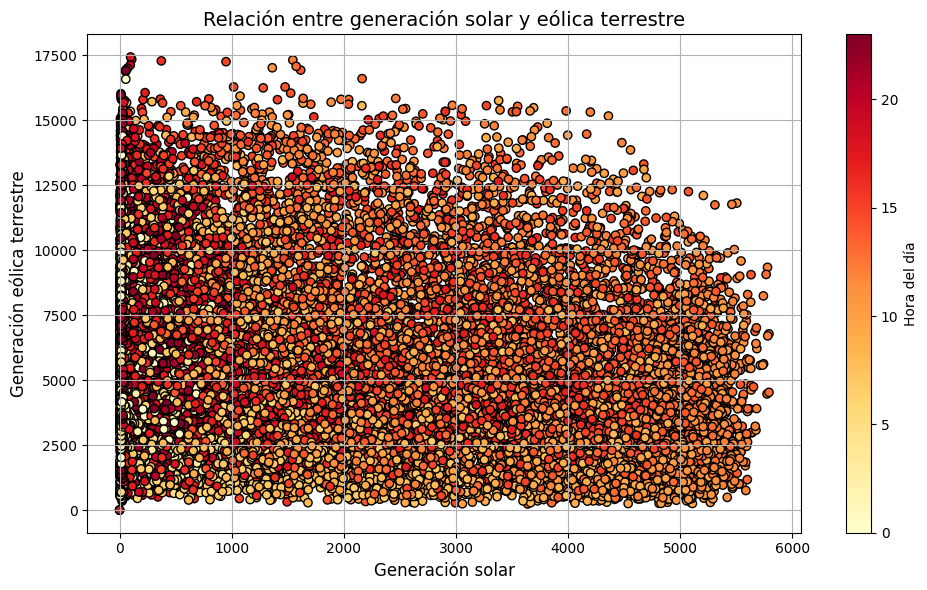

In [113]:
# Extrae la hora del día (si es necesario)
df['hora'] = df['tiempo'].dt.hour

#  Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['generación solar'], df['generación eólica terrestre'], c=df['hora'], cmap=cm.YlOrRd, edgecolor='black')
plt.xlabel('Generación solar', fontsize=12)
plt.ylabel('Generación eólica terrestre', fontsize=12)
plt.title('Relación entre generación solar y eólica terrestre', fontsize=14)
plt.colorbar(label='Hora del día')
plt.grid(True)
plt.tight_layout()
plt.show()



En este grafico observamos:

- Los puntos no se agrupan a lo largo de una línea recta ascendente o descendente. Esto sugiere que la relación entre la generación solar y eólica no es directamente proporcional en todos los momentos del día.

- Los colores nos muestran que la hora del día influye en la generación de energía. Los puntos amarillos (amanecer) se concentran más en la parte inferior, lo que indica que la generación eólica es baja en esas horas, aunque la solar pueda estar aumentando.Los puntos rojos (atardecer) se distribuyen más ampliamente, sugiriendo que la generación eólica puede variar más a lo largo del día.

- La relación entre ambas energías parece ser más compleja y estar influenciada por otros factores, como la hora del día. Hipotesis rechazada

- No hay una correlación positiva clara y consistente entre la generación solar y eólica en todos los momentos del día se rechaza la hipotesis.

existe una correlacion entre la  generación de energía solar y la generación de energía eólica terrestre, donde los días con mayor generación solar también tienden a tener mayor generación eólica.


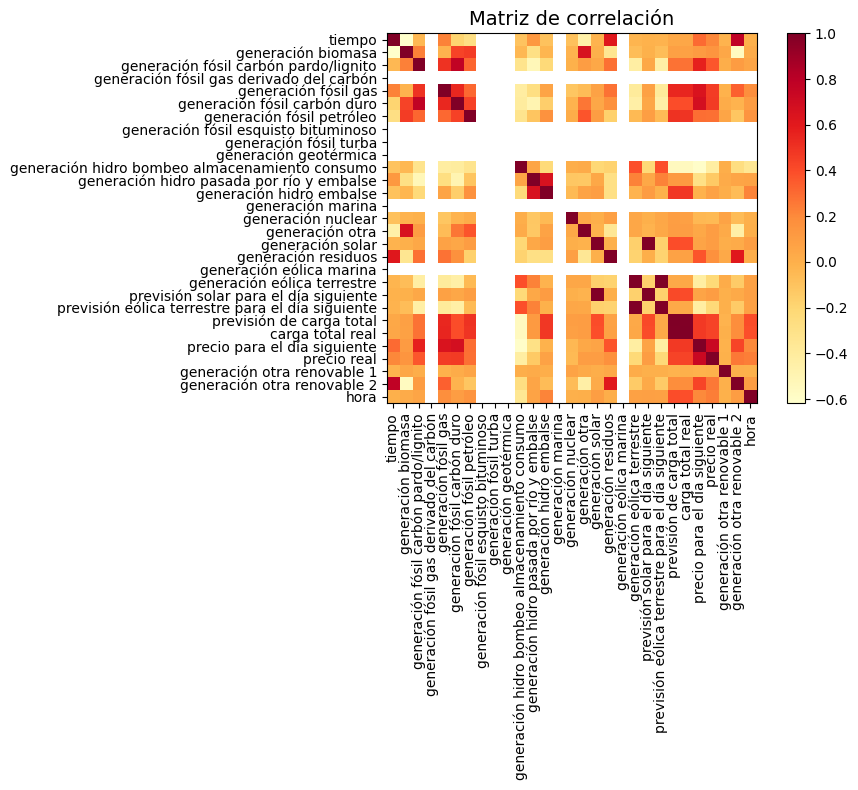

In [114]:
#Mapa de calor
plt.figure(figsize=(10, 8))
plt.imshow(df.corr(), cmap=cm.YlOrRd, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title('Matriz de correlación', fontsize=14)
plt.tight_layout()
plt.show()

La matriz muestra que la demanda de energía en una ciudad está influenciada por dos factores principales, la prevision de la demanda y la hora del dia.

La demanda tiende a ser menor durante la noche y mayor durante el día

Esta información puede ser muy útil para las empresas de energía y los responsables de la planificación energética. Por ejemplo, pueden utilizar la previsión de la demanda y la hora del día para anticipar los picos de consumo y ajustar la producción de energía en consecuencia. También pueden utilizar esta información para diseñar campañas de ahorro de energía más efectivas, dirigidas a las horas del día en que el consumo es más alto

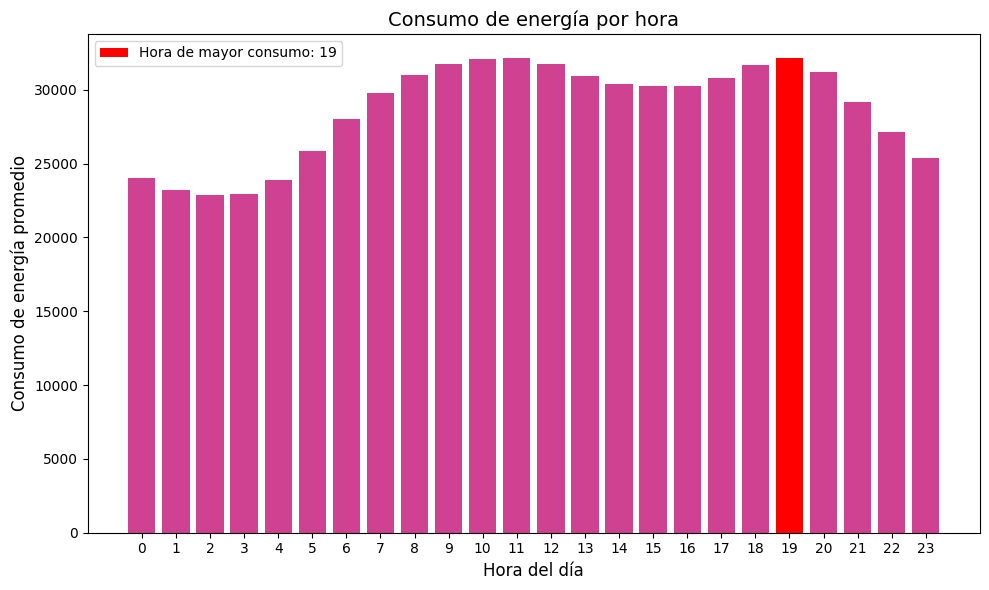

La hora de mayor consumo es: 19
El consumo máximo es: 32183.298425735797


In [58]:

# Agrupa los datos por hora y calcula la media del consumo
consumo_por_hora = df.groupby('hora')['carga total real'].mean()

#Encuentra la hora de mayor consumo
hora_maximo_consumo = consumo_por_hora.idxmax()
consumo_maximo = consumo_por_hora.max()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(consumo_por_hora.index, consumo_por_hora.values)

# Resalta la barra de mayor consumo
plt.bar(hora_maximo_consumo, consumo_maximo, color='red', label=f'Hora de mayor consumo: {hora_maximo_consumo}')

#. Añade etiquetas, título y leyenda
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo de energía promedio', fontsize=12)
plt.title('Consumo de energía por hora', fontsize=14)
plt.xticks(range(24))
plt.legend()

# Muestra el gráfico
plt.tight_layout()
plt.show()

#  Imprime la hora de mayor consumo y el consumo máximo
print(f'La hora de mayor consumo es: {hora_maximo_consumo}')
print(f'El consumo máximo es: {consumo_maximo}')

#Analisis Multivariado

Me estaria costando no me ejecuta bien el codigo. Calculo sera un tema de los formatos

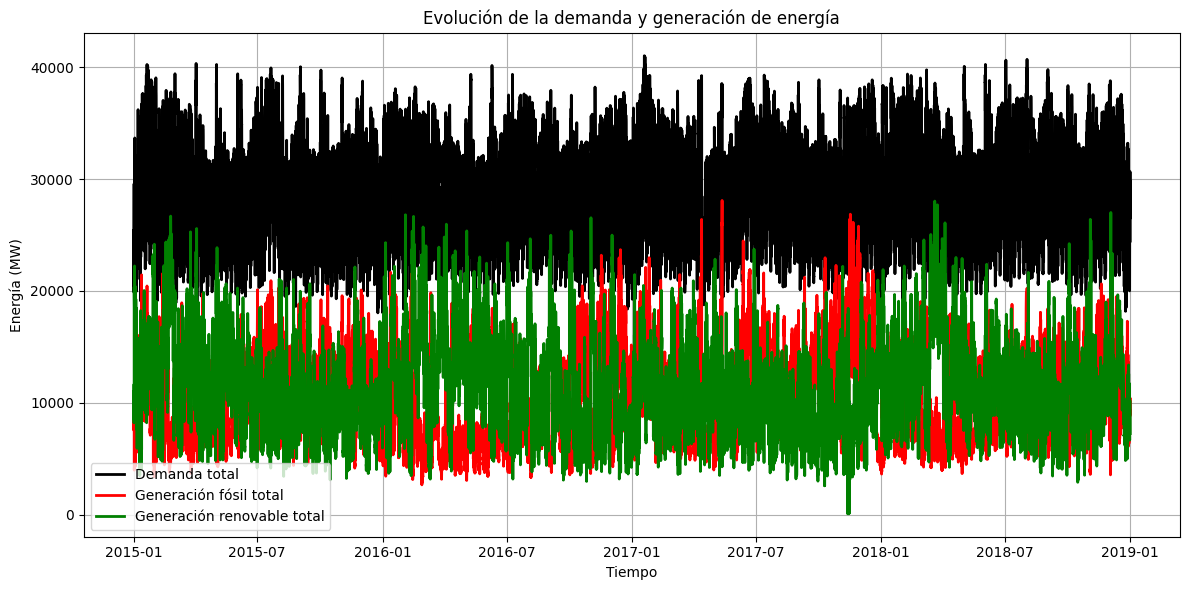

In [59]:

df_copy = df.copy()

#  Convierte la columna 'tiempo' a datetime si es necesario
df_copy['tiempo'] = pd.to_datetime(df_copy['tiempo'], errors='coerce')

#  Calcula la generación fósil total (maneja posibles errores)
cols_fosil = ['generación fósil carbón pardo/lignito', 'generación fósil gas derivado del carbón',
             'generación fósil gas', 'generación fósil carbón duro', 'generación fósil petróleo',
             'generación fósil esquisto bituminoso', 'generación fósil turba']
df_copy['generación fósil total'] = df_copy[cols_fosil].sum(axis=1, skipna=True)

#  Calcula la generación renovable total (maneja posibles errores)
cols_renovables = ['generación biomasa', 'generación geotérmica', 'generación hidro bombeo almacenamiento consumo',
                    'generación hidro pasada por río y embalse', 'generación hidro embalse', 'generación marina',
                    'generación solar', 'generación residuos', 'generación eólica marina', 'generación eólica terrestre',
                    'generación otra renovable 1', 'generación otra renovable 2']
df_copy['generación renovable total'] = df_copy[cols_renovables].sum(axis=1, skipna=True)

#  Define las variables para el gráfico
tiempo = df_copy['tiempo']
demanda = df_copy['carga total real']
generacion_fosil = df_copy['generación fósil total']
generacion_renovable = df_copy['generación renovable total']

# Crea el gráfico de líneas apiladas
plt.figure(figsize=(12, 6))

plt.plot(tiempo, demanda, label='Demanda total', color='black', linewidth=2)
plt.plot(tiempo, generacion_fosil, label='Generación fósil total', color='red', linewidth=2)
plt.plot(tiempo, generacion_renovable, label='Generación renovable total', color='green', linewidth=2) # Changed 'generacion_renovables' to 'generacion_renovable'

plt.xlabel('Tiempo')
plt.ylabel('Energía (MW)')
plt.title('Evolución de la demanda y generación de energía')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico proporciona una visión general de la relación entre la demanda de energía y la generación de energía (fósil y renovable) a lo largo del tiempo.La demanda de energía (línea negra) presenta una variación a lo largo del tiempo, con picos más altos en ciertas épocas del año (posiblemente en invierno y verano, dependiendo de la región).

La generación de energía fósil (línea roja) muestra una tendencia similar a la demanda, lo que sugiere que se utiliza para satisfacer los picos de demanda

La generación de energía renovable (línea verde) también muestra variaciones a lo largo del tiempo, pero no parece seguir la misma tendencia que la demanda. Esto podría indicar que su producción depende de factores como las condiciones climáticas (solar, viento, etc.).


Prediccion segun Random Forest
Energia de Generacion fosil

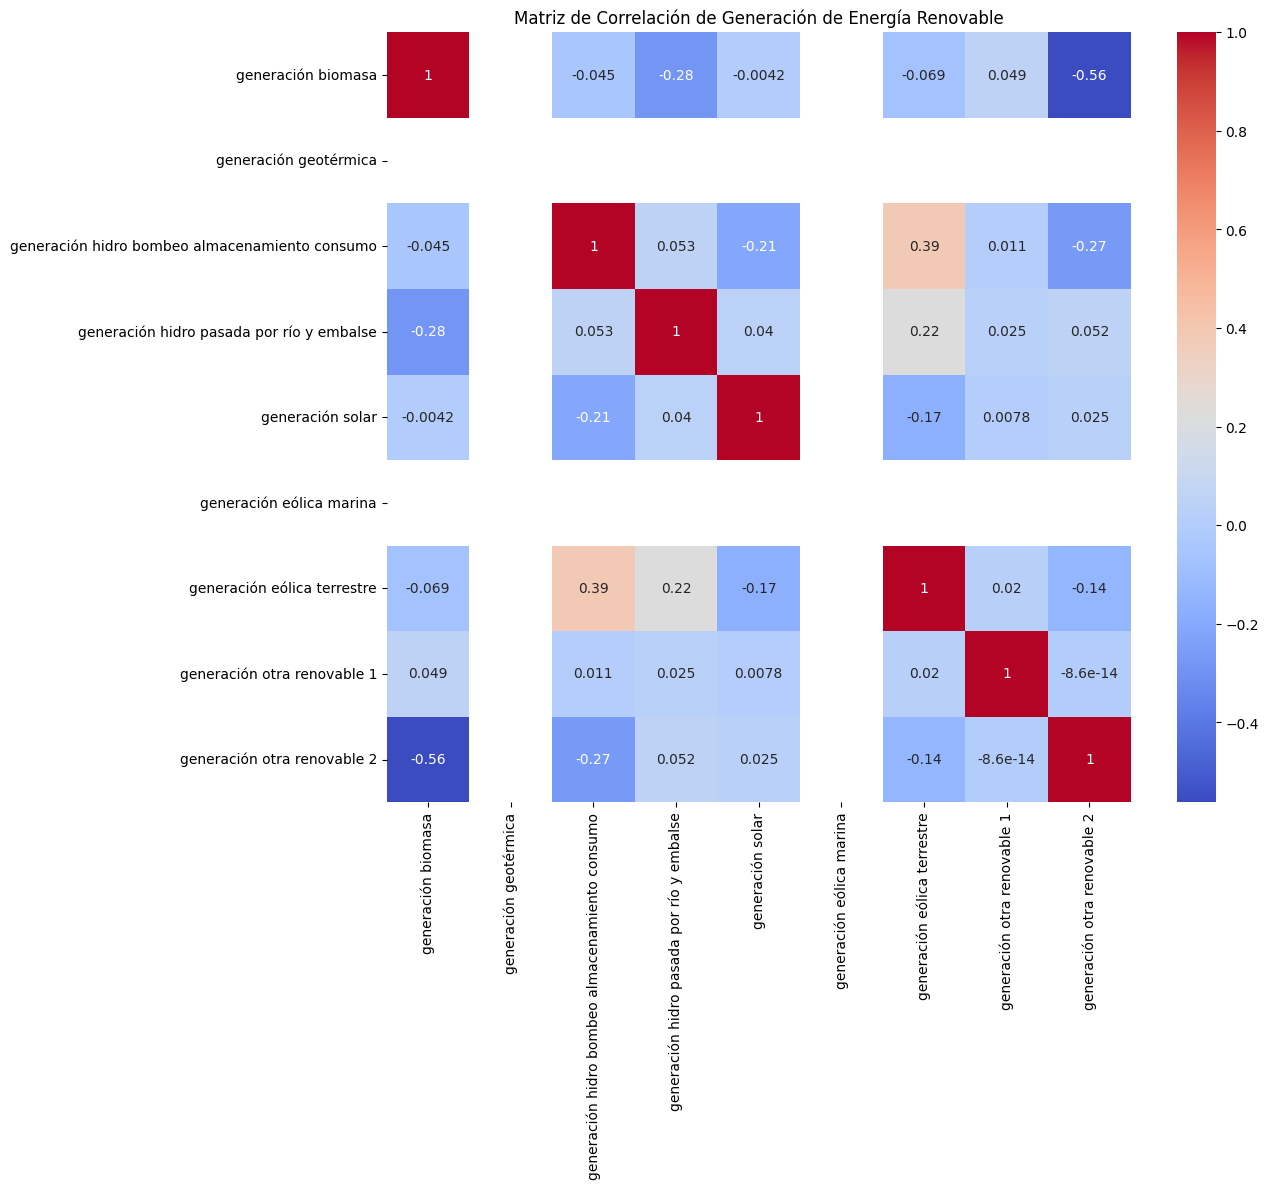

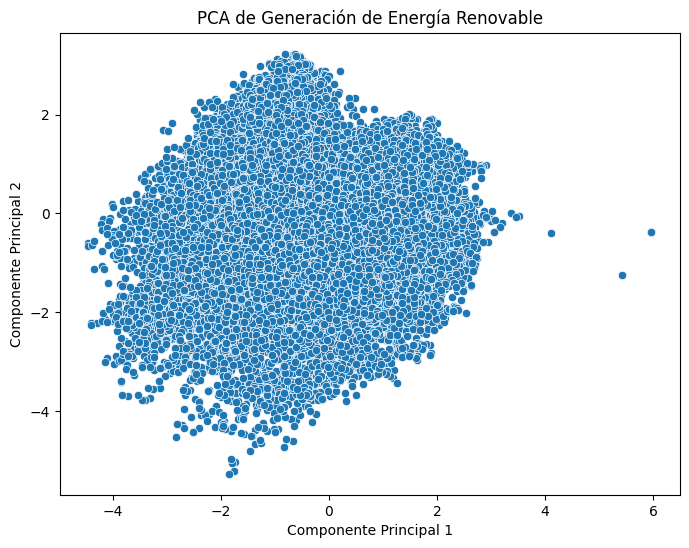

Varianza explicada por cada componente: [0.24546619 0.22853747]


In [ ]:



# Columnas de generación de energía renovable
# Updated renewable_columns to reflect the actual column names in df_copy1
renewable_columns = [
    'generación biomasa',
    'generación geotérmica',
    'generación hidro bombeo almacenamiento consumo',
    'generación hidro pasada por río y embalse',
    'generación solar',
    'generación eólica marina',
    'generación eólica terrestre',
    'generación otra renovable 1',  # Use the actual column name
    'generación otra renovable 2'   # Use the actual column name
]

# 1. Análisis de Correlación
correlation_matrix = df_copy1[renewable_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Generación de Energía Renovable')
plt.show()

# 2. Análisis de Componentes Principales (PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy1[renewable_columns])

pca = PCA(n_components=2)  # Puedes ajustar el número de componentes
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA de Generación de Energía Renovable')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)

La regresión lineal tiene un MSE ligeramente menor, lo que indica un mejor ajuste promedio.
Random Forest captura mejor la variabilidad a corto plazo, especialmente los picos y valles extremos.

#Random Forest Regressor

In [ ]:
#agrego oirque no esta
if 'dia_semana' not in df.columns:
    df['dia_semana'] = df['tiempo'].dt.dayofweek  # 0: Lunes, 1: Martes, ..., 6: Domingo
if 'mes' not in df.columns:
    df['mes'] = df['tiempo'].dt.month  # 1: Enero, 2: Febrero, ..., 12: Diciembre

# Variables predictoras
features = ['previsión eólica terrestre para el día siguiente', 'hora', 'dia_semana', 'mes'] #Variables relevanted

# Variable objetivo (target)
target = 'generación eólica terrestre'

#conjuntos de datos X (features) e y (target)
X = df[features]  # Ahora usa 'df' en lugar de 'df_copy'
y = df[target]  # Ahora usa 'df' en lugar de 'df_copy'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [ ]:
#consulta 1 RF regressor predice valores numéricos continuos, no categorías. no imprimpo el accuracy, ej de la clase 21

In [ ]:
# Modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Realizar predicciones
y_pred = model_rf.predict(X_test)



In [ ]:

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest - MSE: {mse:.2f}, R^2: {r2:.2f}')

Random Forest - MSE: 399732.45, R^2: 0.96


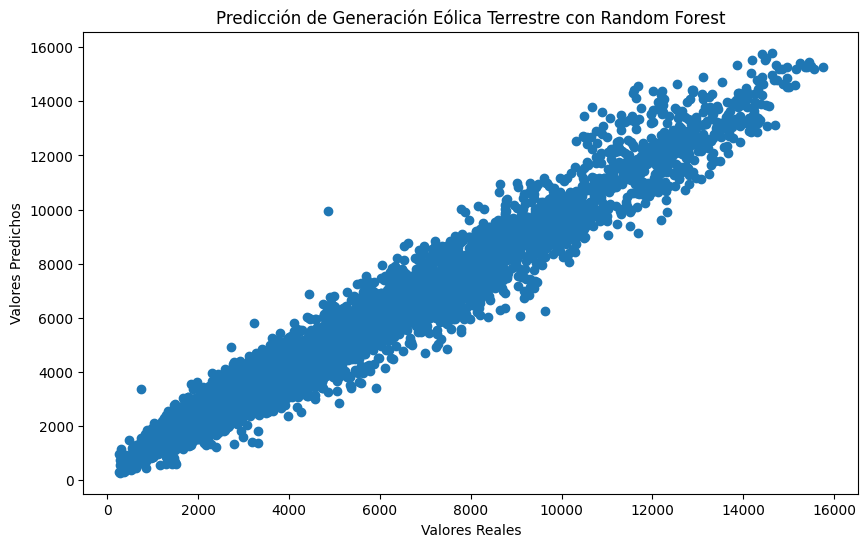

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicción de Generación Eólica Terrestre con Random Forest')
plt.show()

El gráfico muestra una fuerte correlación positiva entre los valores reales y los valores predichos. Los puntos se agrupan estrechamente alrededor de una línea diagonal, lo que indica que el modelo está haciendo predicciones precisas.

#Agregar VAlidacion Cruzada